# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [98]:
import pandas as pd

df_flights = pd.read_csv('data/flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [01 - Flights Challenge.ipynb](01%20-%20Flights%20Solution.ipynb).

# 1. Cleaning and processing the data

In [99]:
# Your code to explore the data
# first look at the information about the data
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271940 entries, 0 to 271939
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               271940 non-null  int64  
 1   Month              271940 non-null  int64  
 2   DayofMonth         271940 non-null  int64  
 3   DayOfWeek          271940 non-null  int64  
 4   Carrier            271940 non-null  object 
 5   OriginAirportID    271940 non-null  int64  
 6   OriginAirportName  271940 non-null  object 
 7   OriginCity         271940 non-null  object 
 8   OriginState        271940 non-null  object 
 9   DestAirportID      271940 non-null  int64  
 10  DestAirportName    271940 non-null  object 
 11  DestCity           271940 non-null  object 
 12  DestState          271940 non-null  object 
 13  CRSDepTime         271940 non-null  int64  
 14  DepDelay           271940 non-null  int64  
 15  DepDel15           269179 non-null  float64
 16  CR

In [100]:
# then identify null values
df_flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

There's only one colum with nulls - `DepDel15`. The values in this column are booleans taking value *1* if `DepDelay` value is >= 15

In [101]:
# study the rows with nulls
df_flights[df_flights.isnull().any(axis=1)]

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
171,2013,4,18,4,DL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,13930,Chicago O'Hare International,Chicago,IL,835,0,NaN,945,0,1,1
359,2013,5,22,3,OO,11433,Detroit Metro Wayne County,Detroit,MI,13930,Chicago O'Hare International,Chicago,IL,1719,0,NaN,1738,0,1,1
429,2013,7,3,3,MQ,13851,Will Rogers World,Oklahoma City,OK,13930,Chicago O'Hare International,Chicago,IL,1935,0,NaN,2125,0,1,1
545,2013,4,13,6,FL,14524,Richmond International,Richmond,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,630,0,NaN,809,0,1,1
554,2013,5,8,3,EV,12953,LaGuardia,New York,NY,11193,Cincinnati/Northern Kentucky International,Cincinnati,OH,1320,0,NaN,1524,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271410,2013,8,5,1,WN,14831,Norman Y. Mineta San Jose International,San Jose,CA,10800,Bob Hope,Burbank,CA,1525,0,NaN,1625,0,1,1
271607,2013,6,18,2,EV,14100,Philadelphia International,Philadelphia,PA,13244,Memphis International,Memphis,TN,600,0,NaN,729,0,1,1
271634,2013,5,8,3,AA,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,14100,Philadelphia International,Philadelphia,PA,1325,0,NaN,1745,0,1,1
271671,2013,10,8,2,WN,12892,Los Angeles International,Los Angeles,CA,12889,McCarran International,Las Vegas,NV,1440,0,NaN,1540,0,1,1


Using `np.where` the values in `DepDel15` are set to 1 or 0 depending on the values in `DepDelay`. 

The same is done with `ArrDel15` to prevent possible errors.

In [102]:
import numpy as np

# DepDel15 is a boolean type column which has the value of 1 - True if the DepDelay value is over 15
# That's why we refill it based on the DepDelay time
df_flights['DepDel15'] = np.where(df_flights['DepDelay'] >= 15, 1, 0)
# Just to make sure we'll do the same with arrival delays
df_flights['ArrDel15'] = np.where(df_flights['ArrDelay'] >= 15, 1, 0)

In [103]:
# make sure there are no more nulls
df_flights.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

We'll also create a date column to look at delays in dinamics

And route column to compare different routes.

In [104]:
df_flights['Date'] = pd.to_datetime(dict(year=df_flights['Year'], month=df_flights['Month'], day=df_flights['DayofMonth']))
df_flights['Route'] = df_flights['OriginAirportName'] + ' - ' + df_flights['DestAirportName']
df_flights

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,...,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled,Date,Route
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,...,NY,1539,4,0,1824,13,0,0,2013-09-16,Tampa International - John F. Kennedy Internat...
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,...,IL,710,3,0,740,22,1,0,2013-09-23,Pittsburgh International - Chicago Midway Inte...
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,...,DC,810,-3,0,1614,-7,0,0,2013-09-07,Seattle/Tacoma International - Ronald Reagan W...
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,...,OH,804,35,1,1027,33,1,0,2013-07-22,Chicago O'Hare International - Cleveland-Hopki...
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,...,GA,545,-1,0,728,-9,0,0,2013-05-16,Norfolk International - Hartsfield-Jackson Atl...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271935,2013,9,20,5,VX,13204,Orlando International,Orlando,FL,12892,...,CA,1730,1,0,1945,18,1,0,2013-09-20,Orlando International - Los Angeles International
271936,2013,4,19,5,FL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,11697,...,FL,1020,24,1,1218,61,1,0,2013-04-19,Hartsfield-Jackson Atlanta International - For...
271937,2013,10,26,6,WN,12191,William P Hobby,Houston,TX,10821,...,MD,1540,30,1,1935,15,1,0,2013-10-26,William P Hobby - Baltimore/Washington Interna...
271938,2013,5,7,2,HA,13830,Kahului Airport,Kahului,HI,12173,...,HI,609,-5,0,641,-6,0,0,2013-05-07,Kahului Airport - Honolulu International


# 2. Study the data

In [105]:
# get the mean departure delay
mean_depdel = df_flights['DepDelay'].mean()

# get the mean arrival delay
mean_arrdel = df_flights['ArrDelay'].mean()

# print both
print('The average departure delay:\t{:.2f}\nThe average arrival delay:\t{:.2f}'.format(mean_depdel,mean_arrdel))

The average departure delay:	10.35
The average arrival delay:	6.50


On average arrival delays were shorter than departure delays.

> A number of barcharts will be made to see how mean delays differ by different cuts.

In [106]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

def delays_cut(cut):
    ''' This function will print a grouped barchart for mean delay times based on passed column with labels '''
    delays_by_cut = df_flights.groupby(cut)[['ArrDelay', 'DepDelay']].mean().reset_index()

    x = np.arange(len(delays_by_cut))
    width = 0.35

    fig, ax = plt.subplots(figsize=(30, 10))
    ax.bar(x - width/2, delays_by_cut['ArrDelay'], width, label='Arrival Delay')
    ax.bar(x + width/2, delays_by_cut['DepDelay'], width, label='Departure Delay')

    ax.set_ylabel('Minutes', fontsize=20)
    ax.set_xlabel(cut.name, fontsize=20)
    ax.set_title('Delays by ' + cut.name, fontsize=20)
    ax.set_xticks(x, delays_by_cut[cut.name], rotation=90)
    ax.tick_params(axis='both', which='both', labelsize=20)

    ax.legend(fontsize=20)



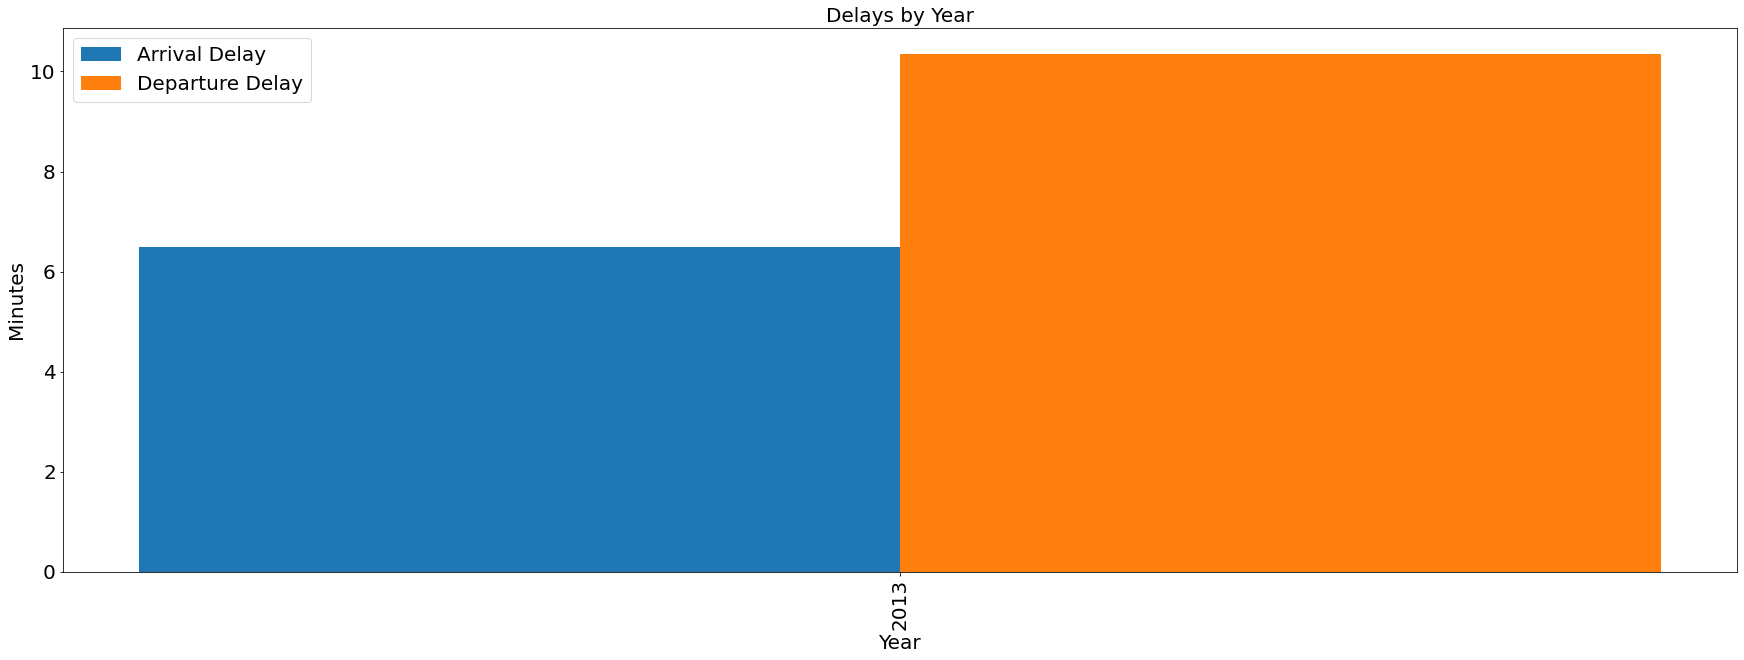

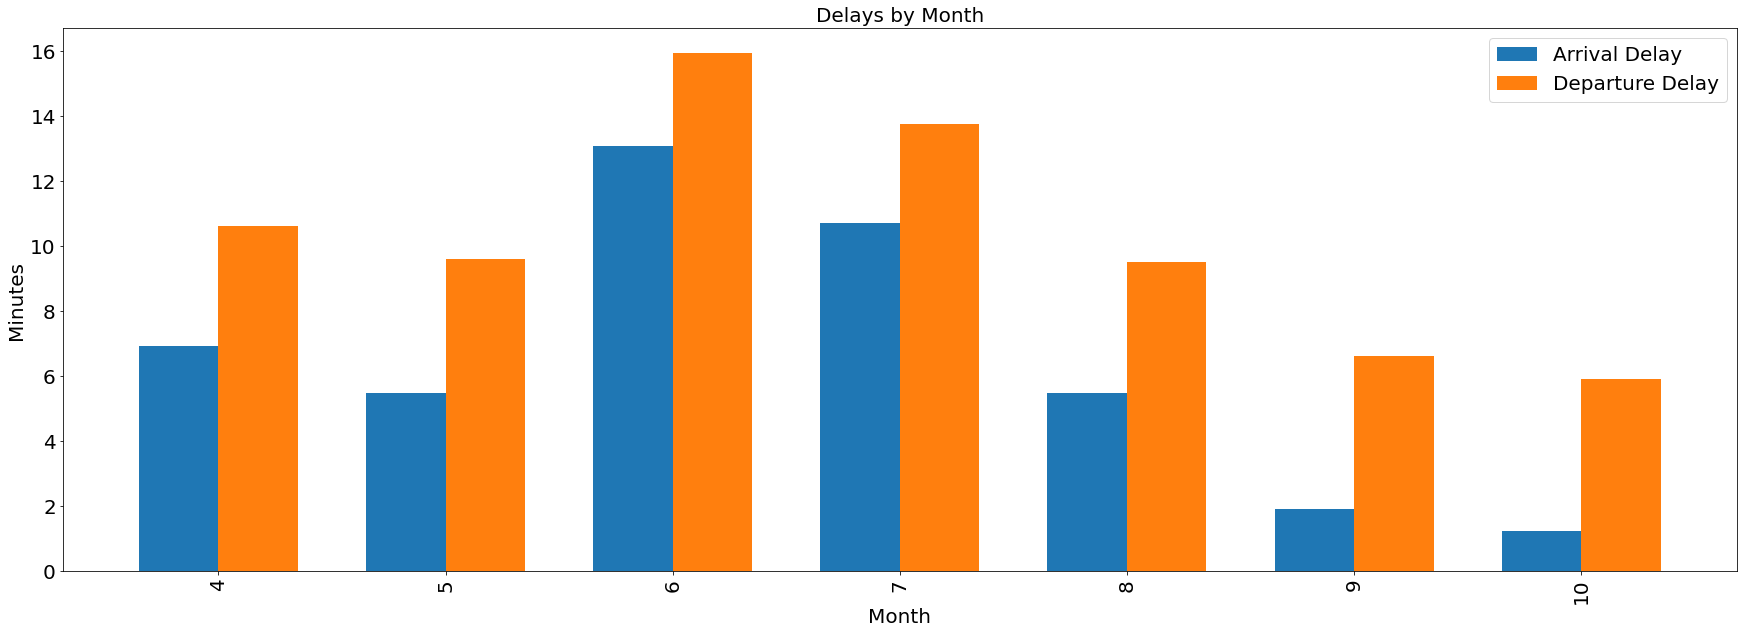

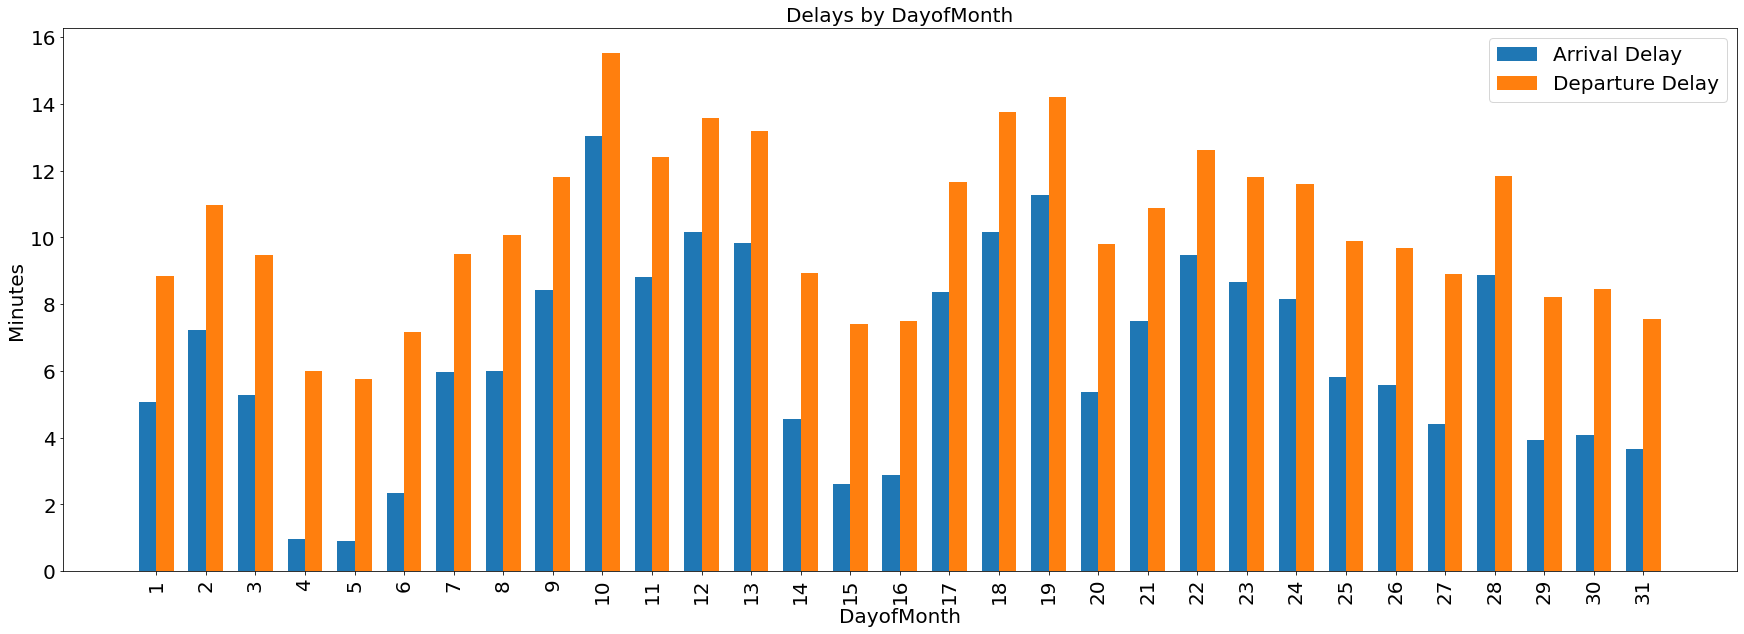

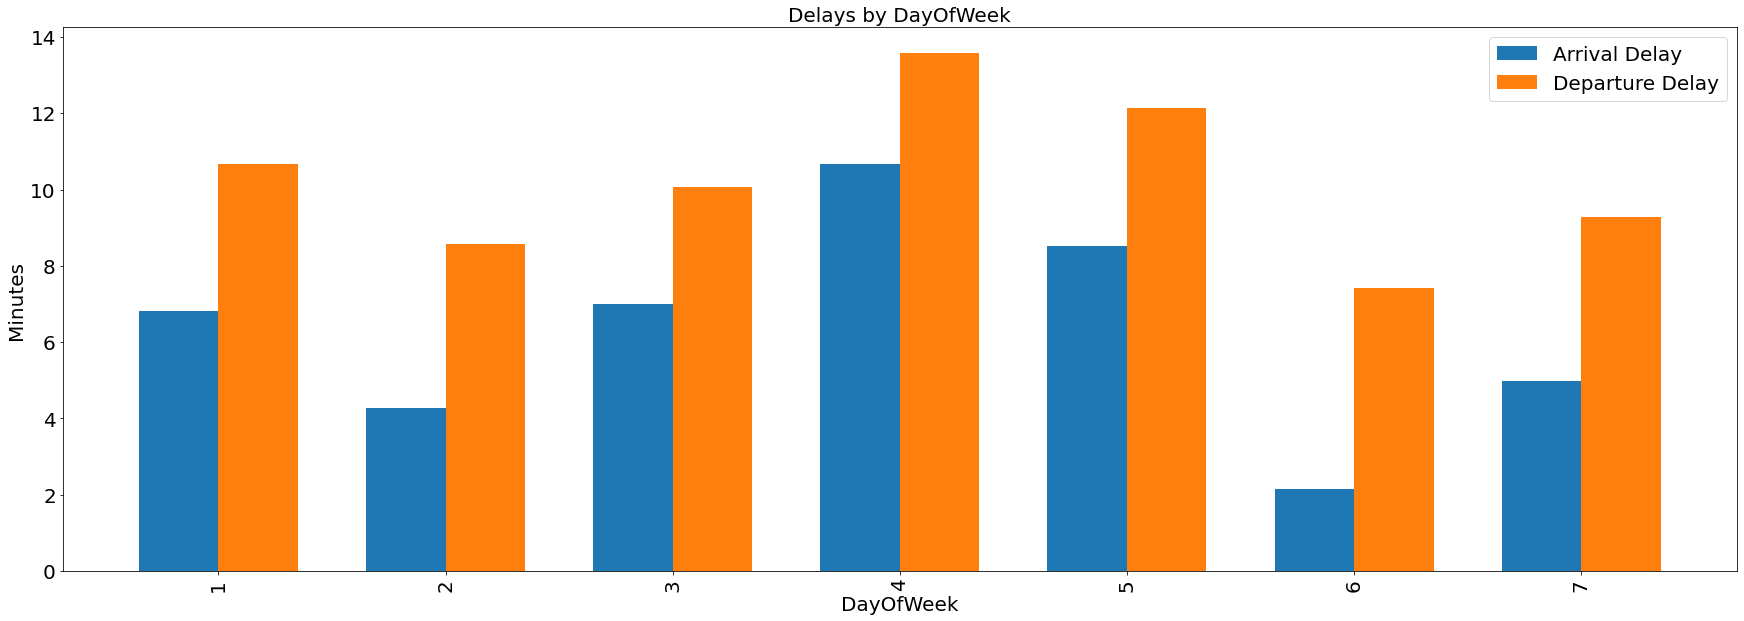

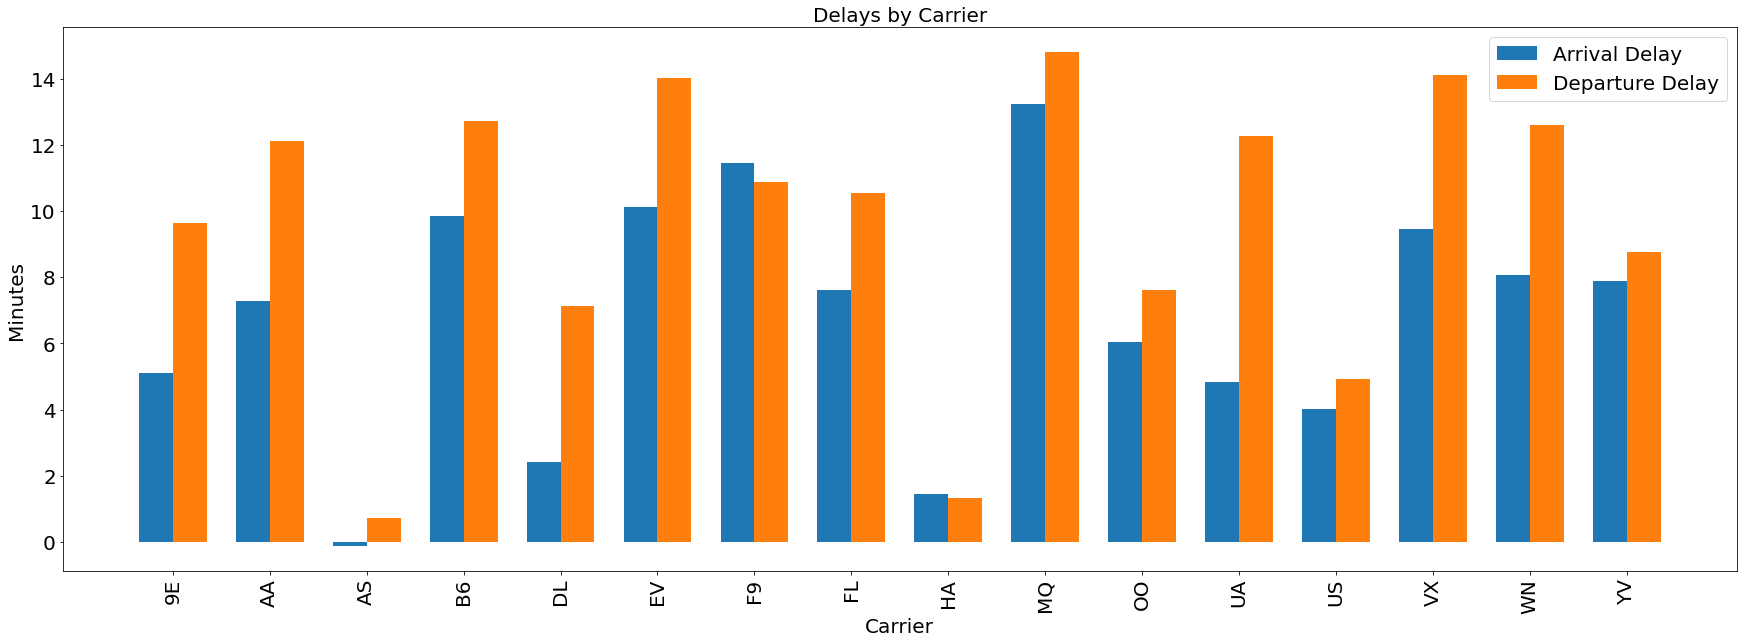

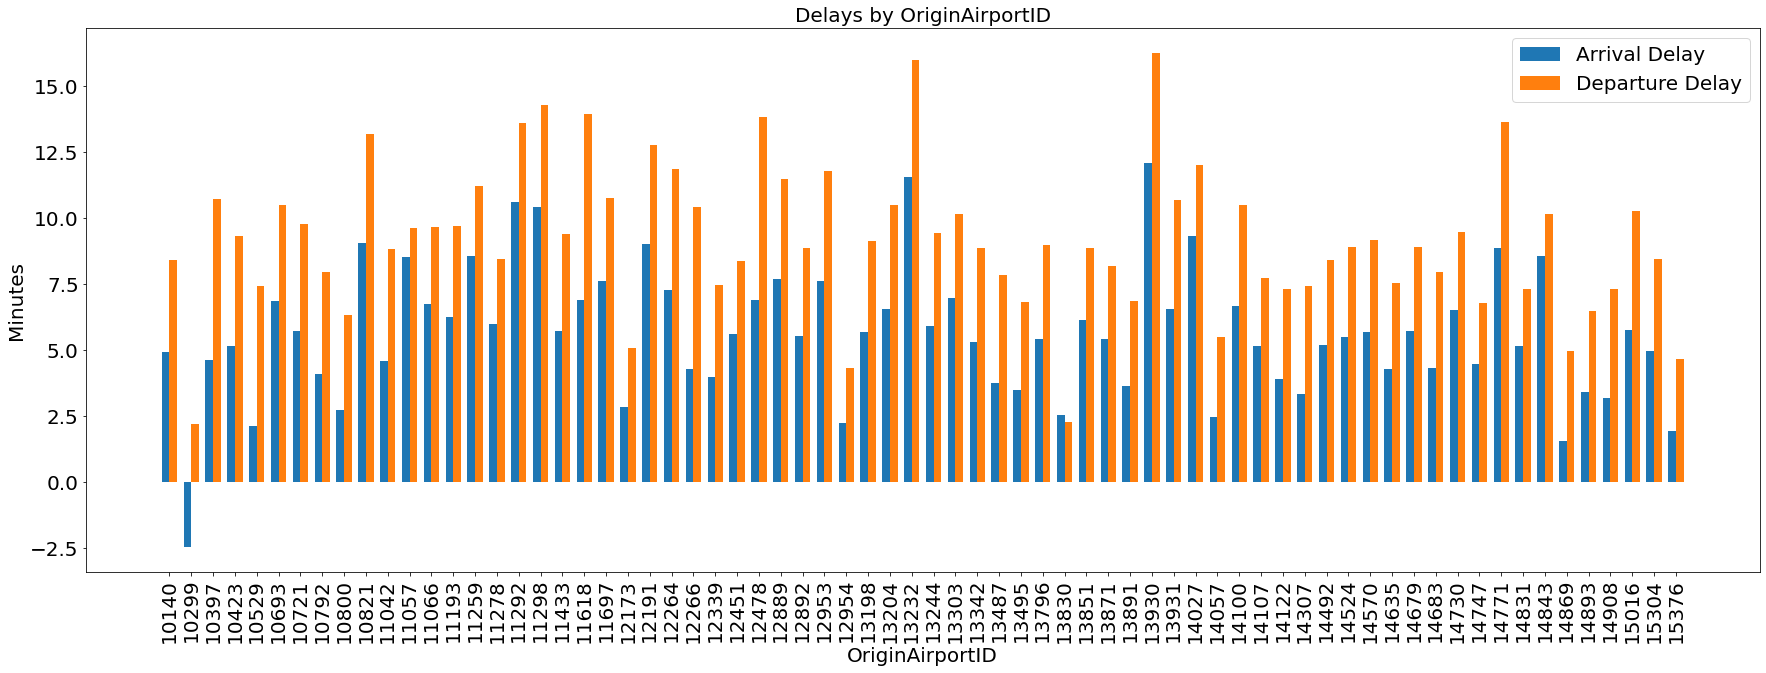

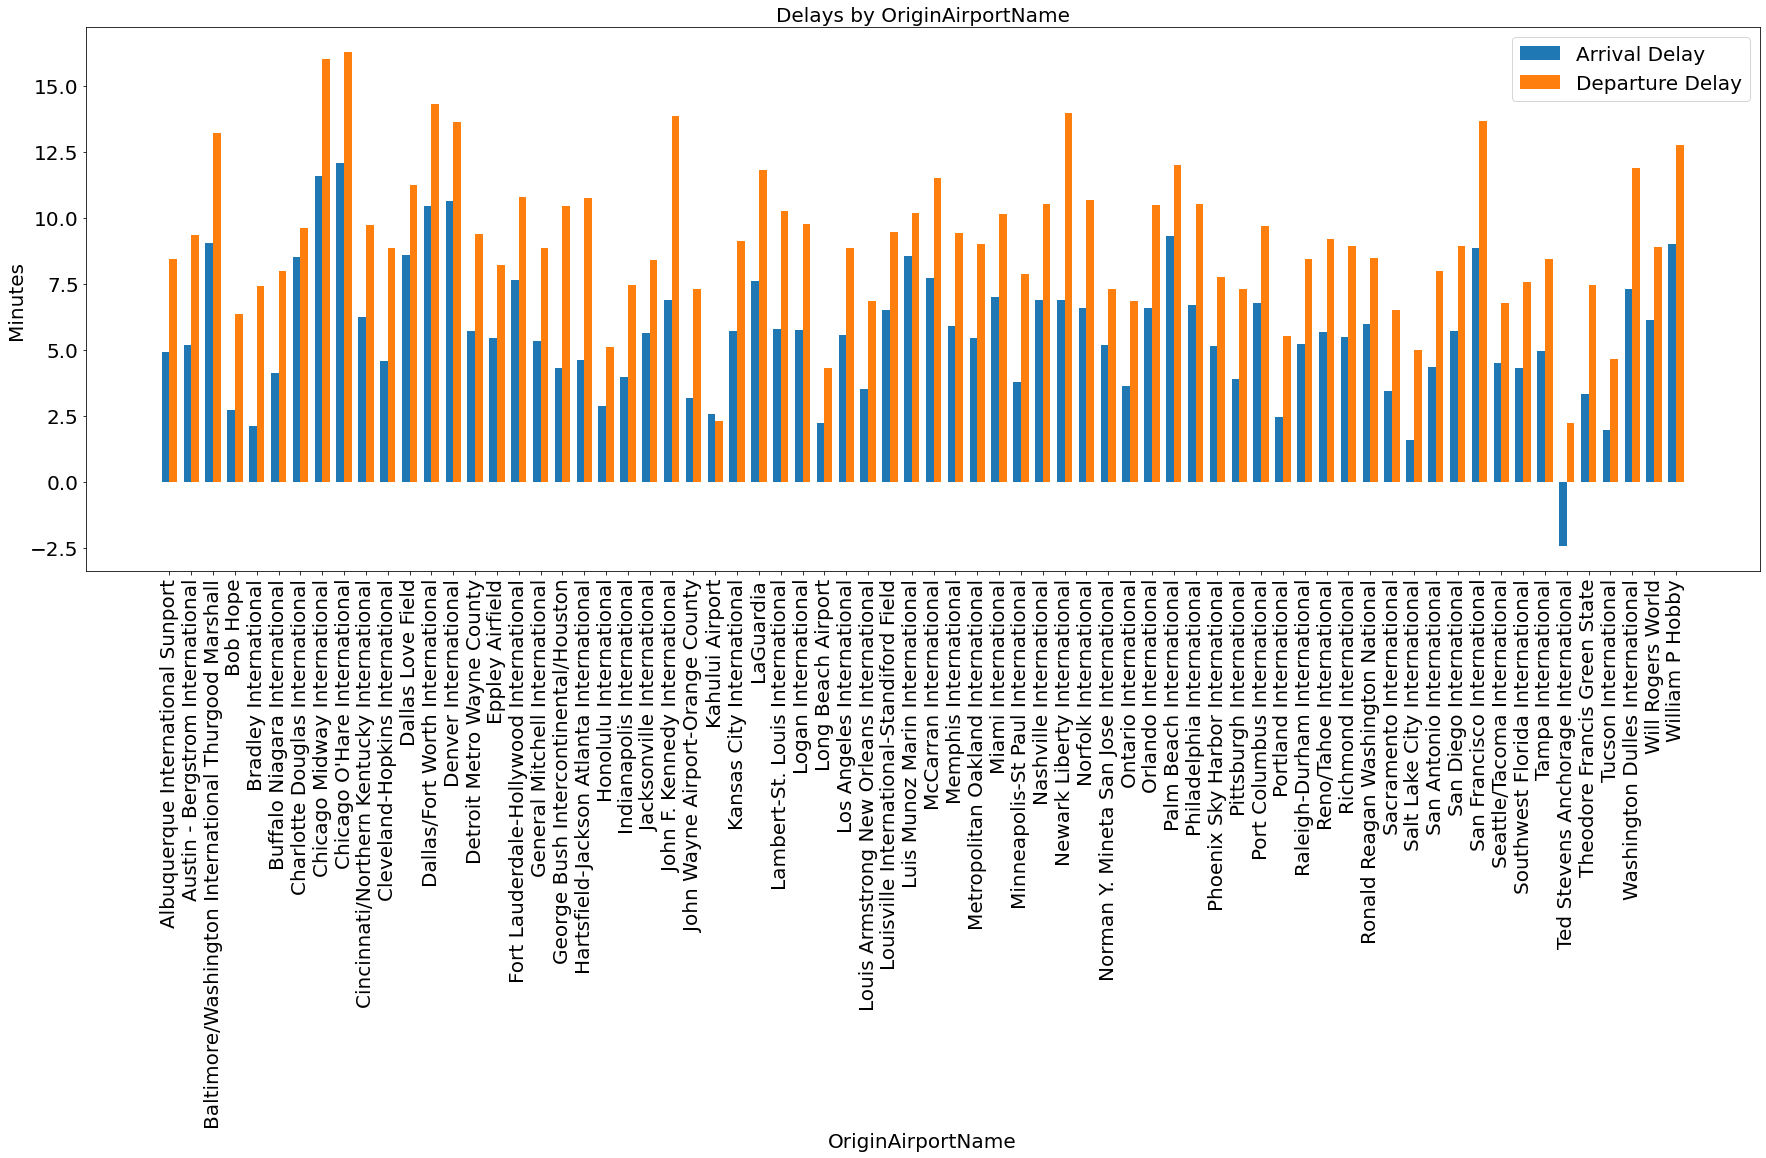

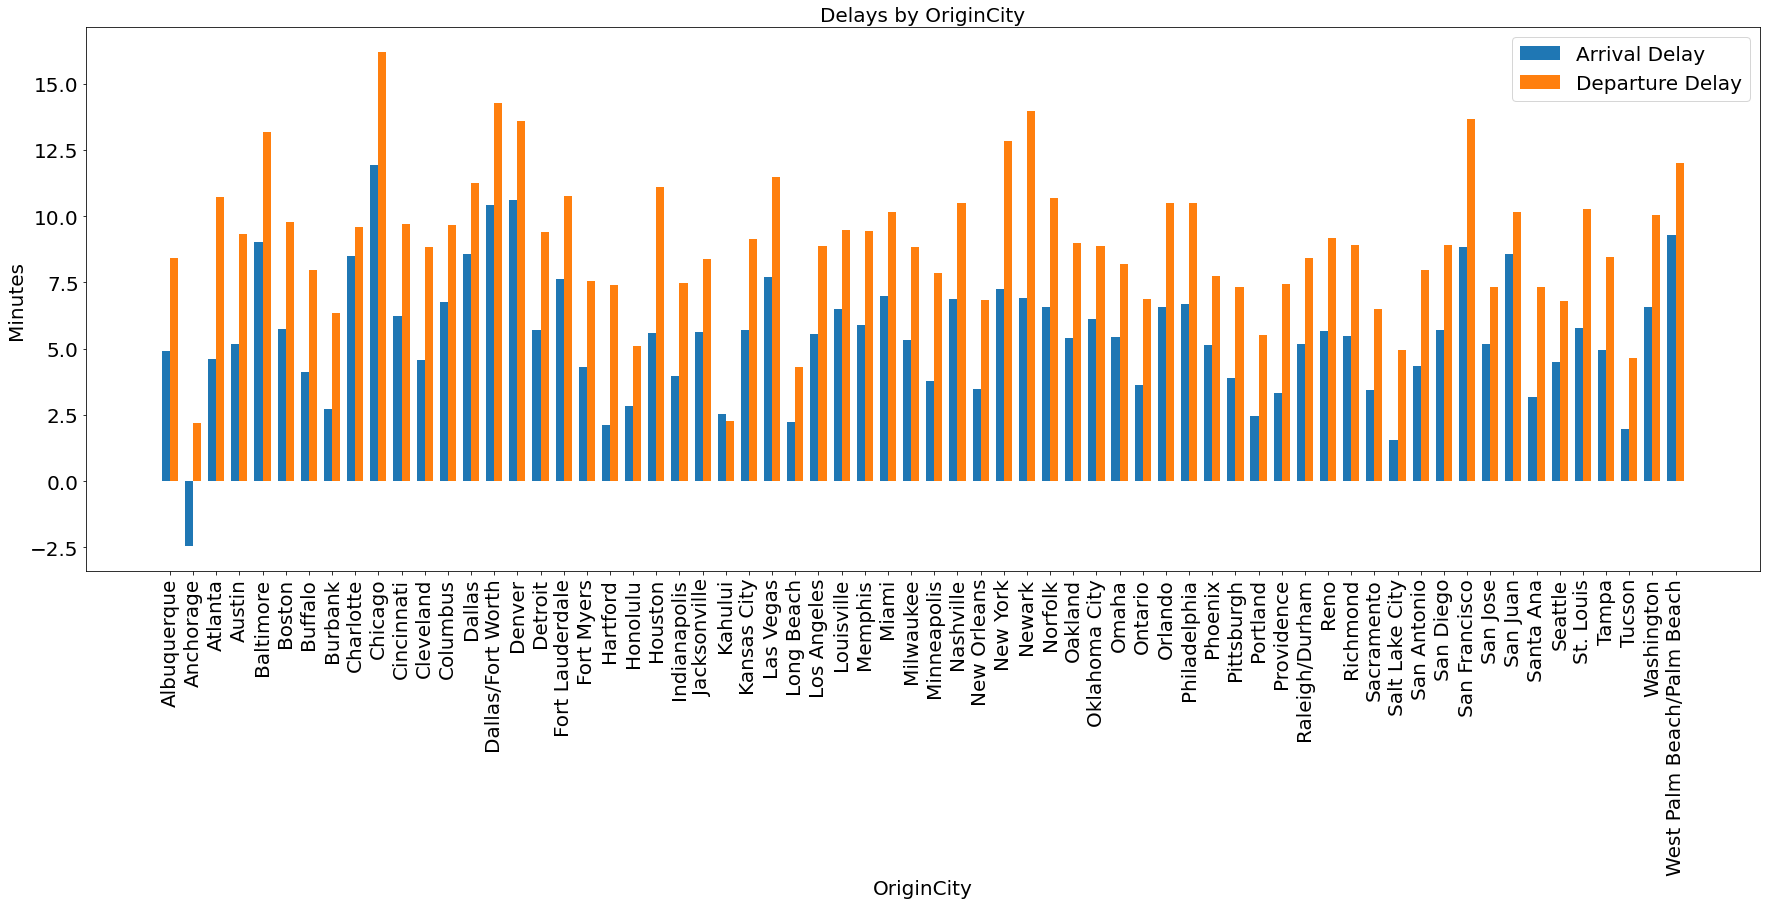

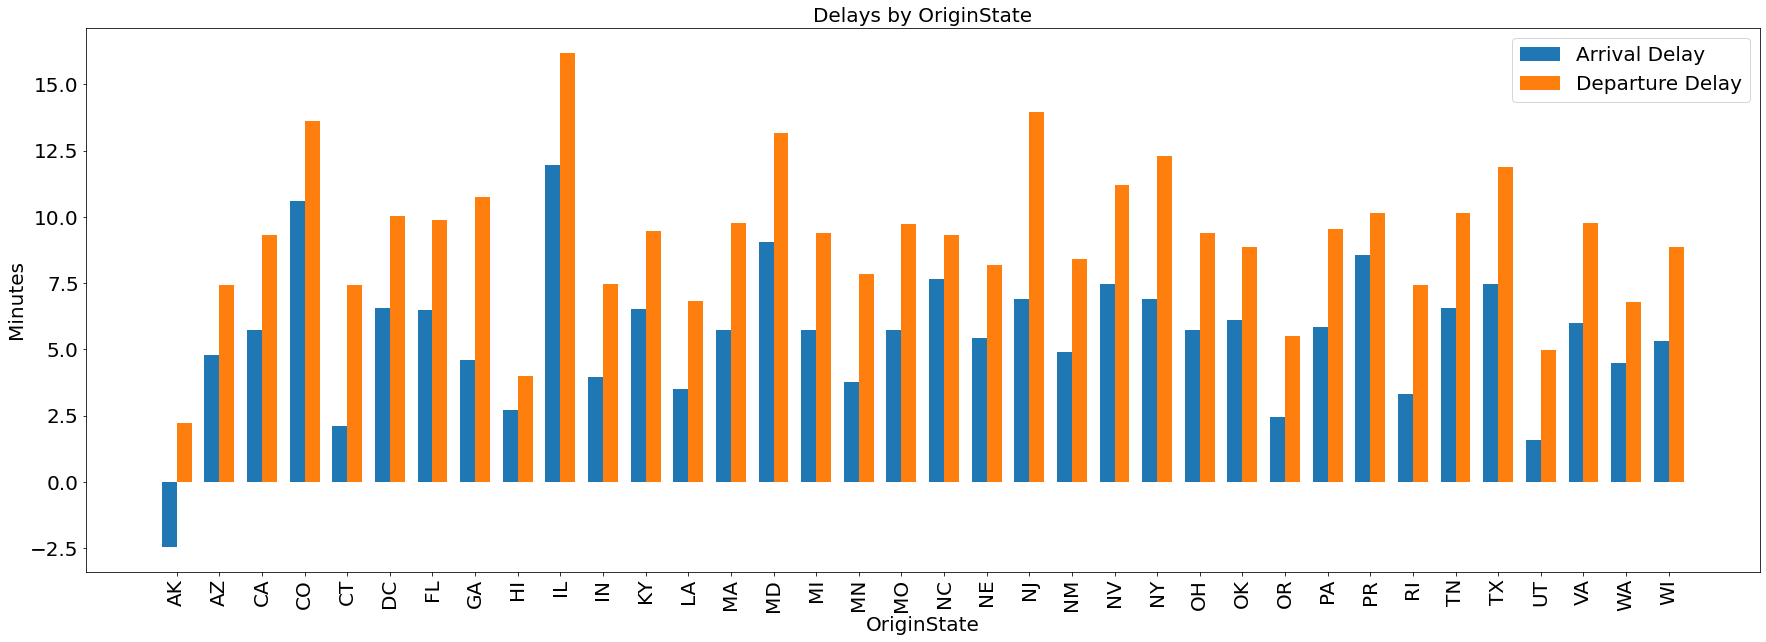

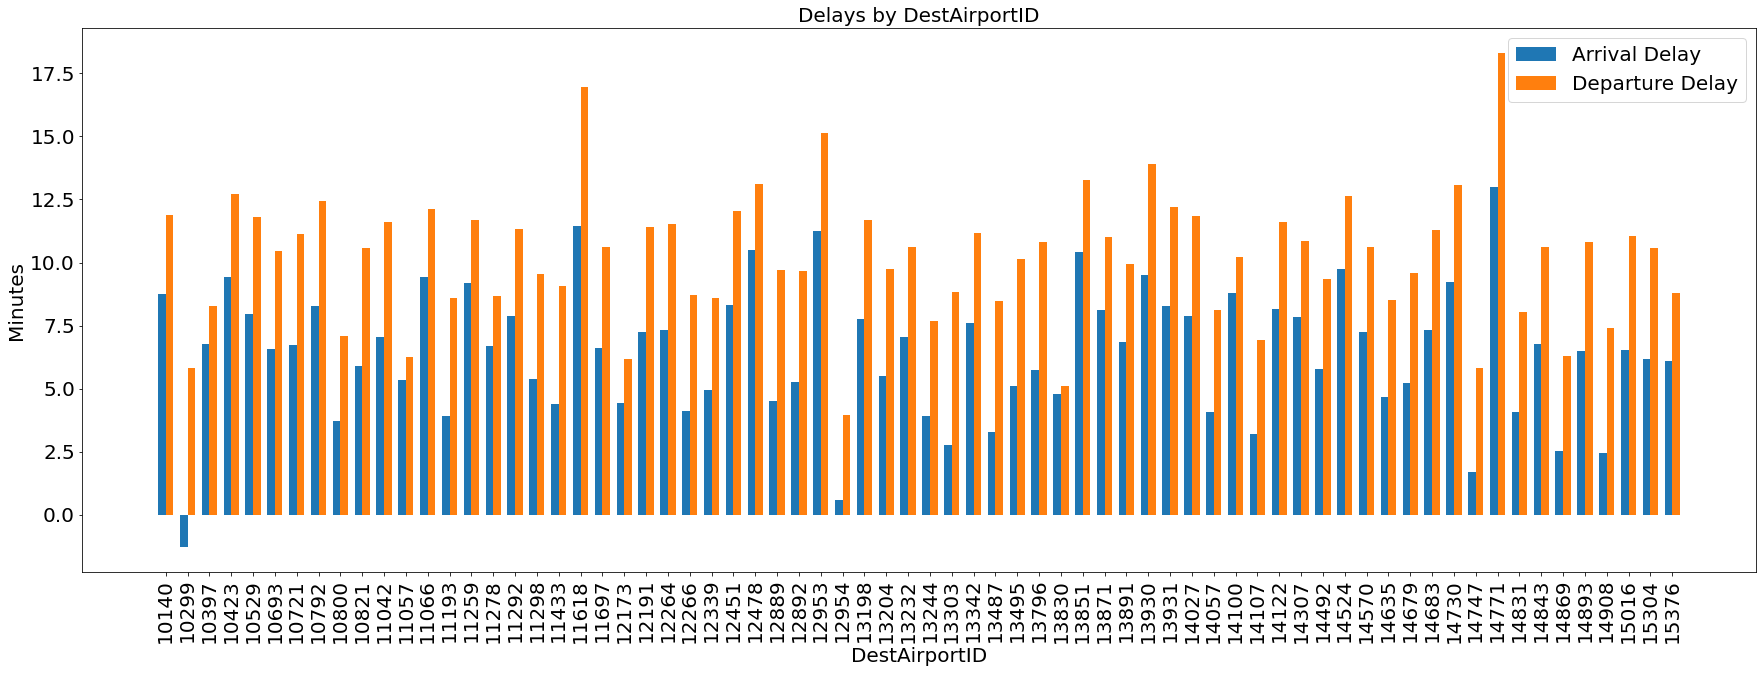

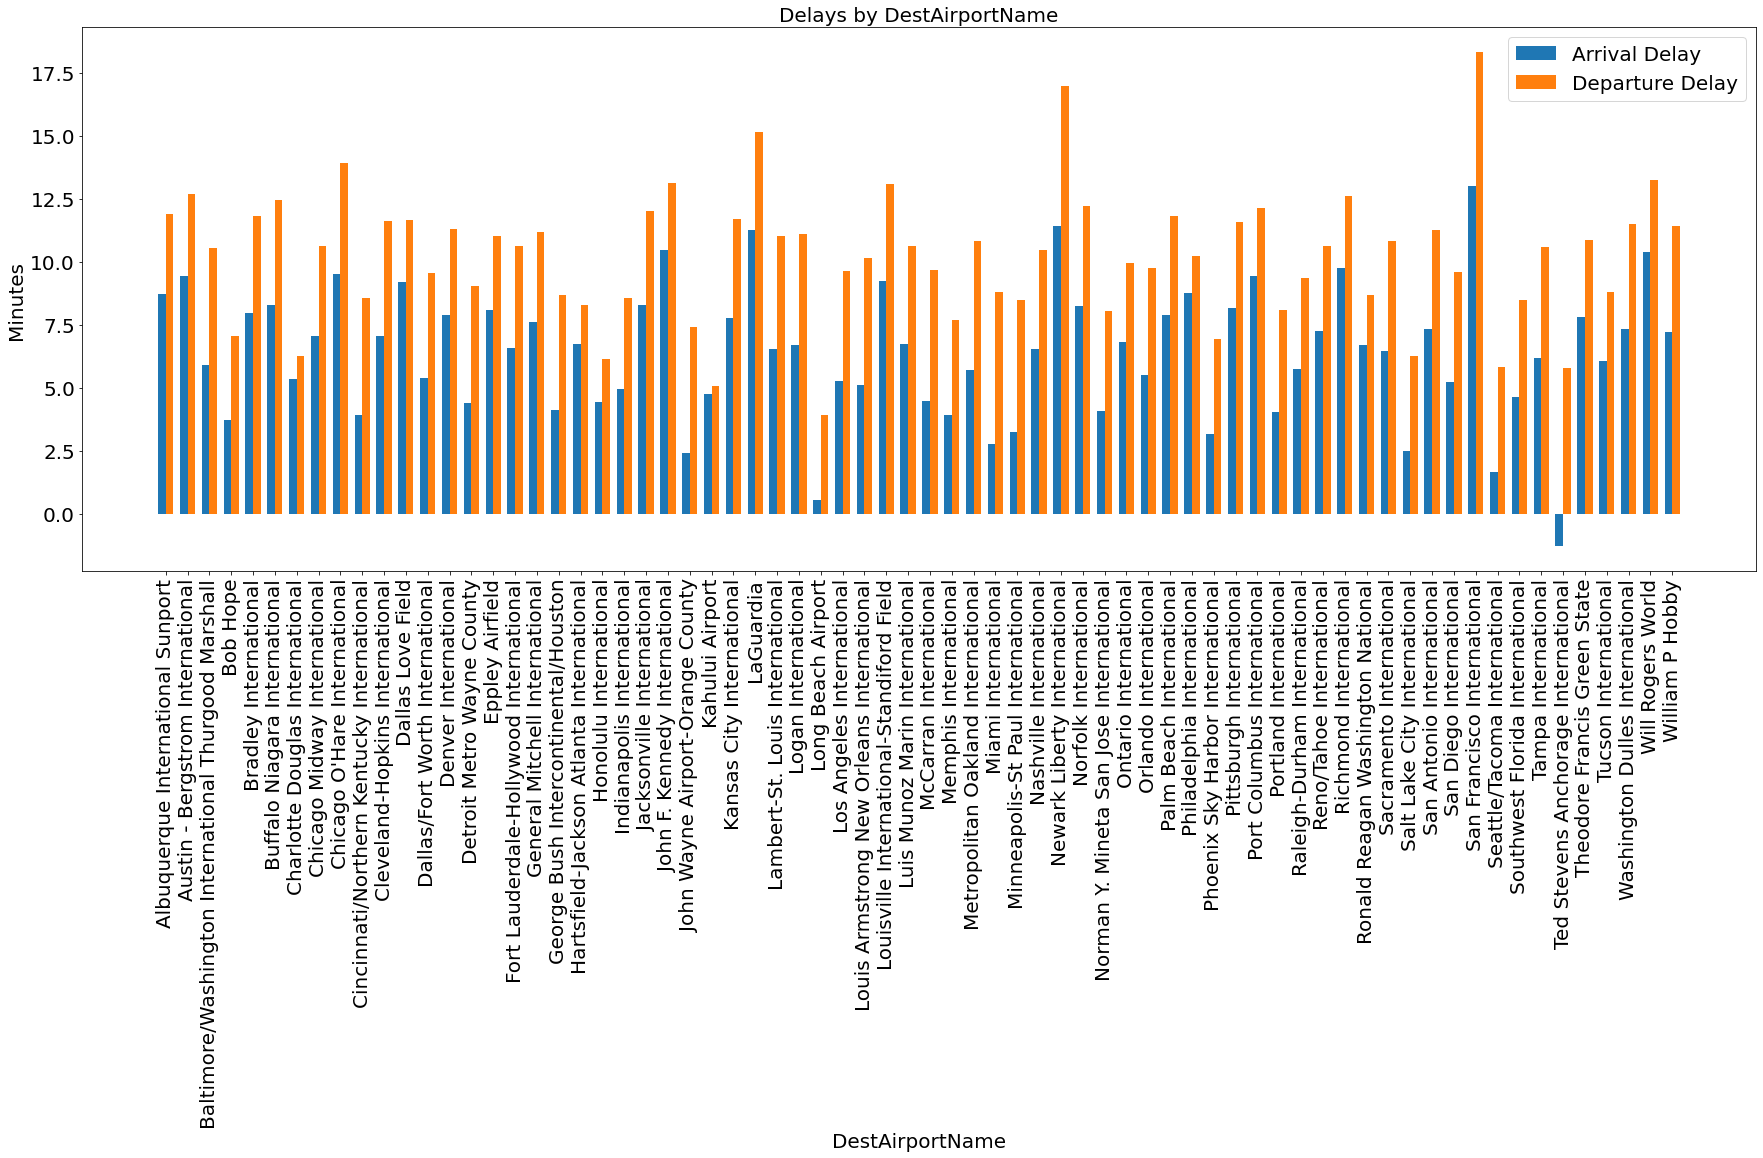

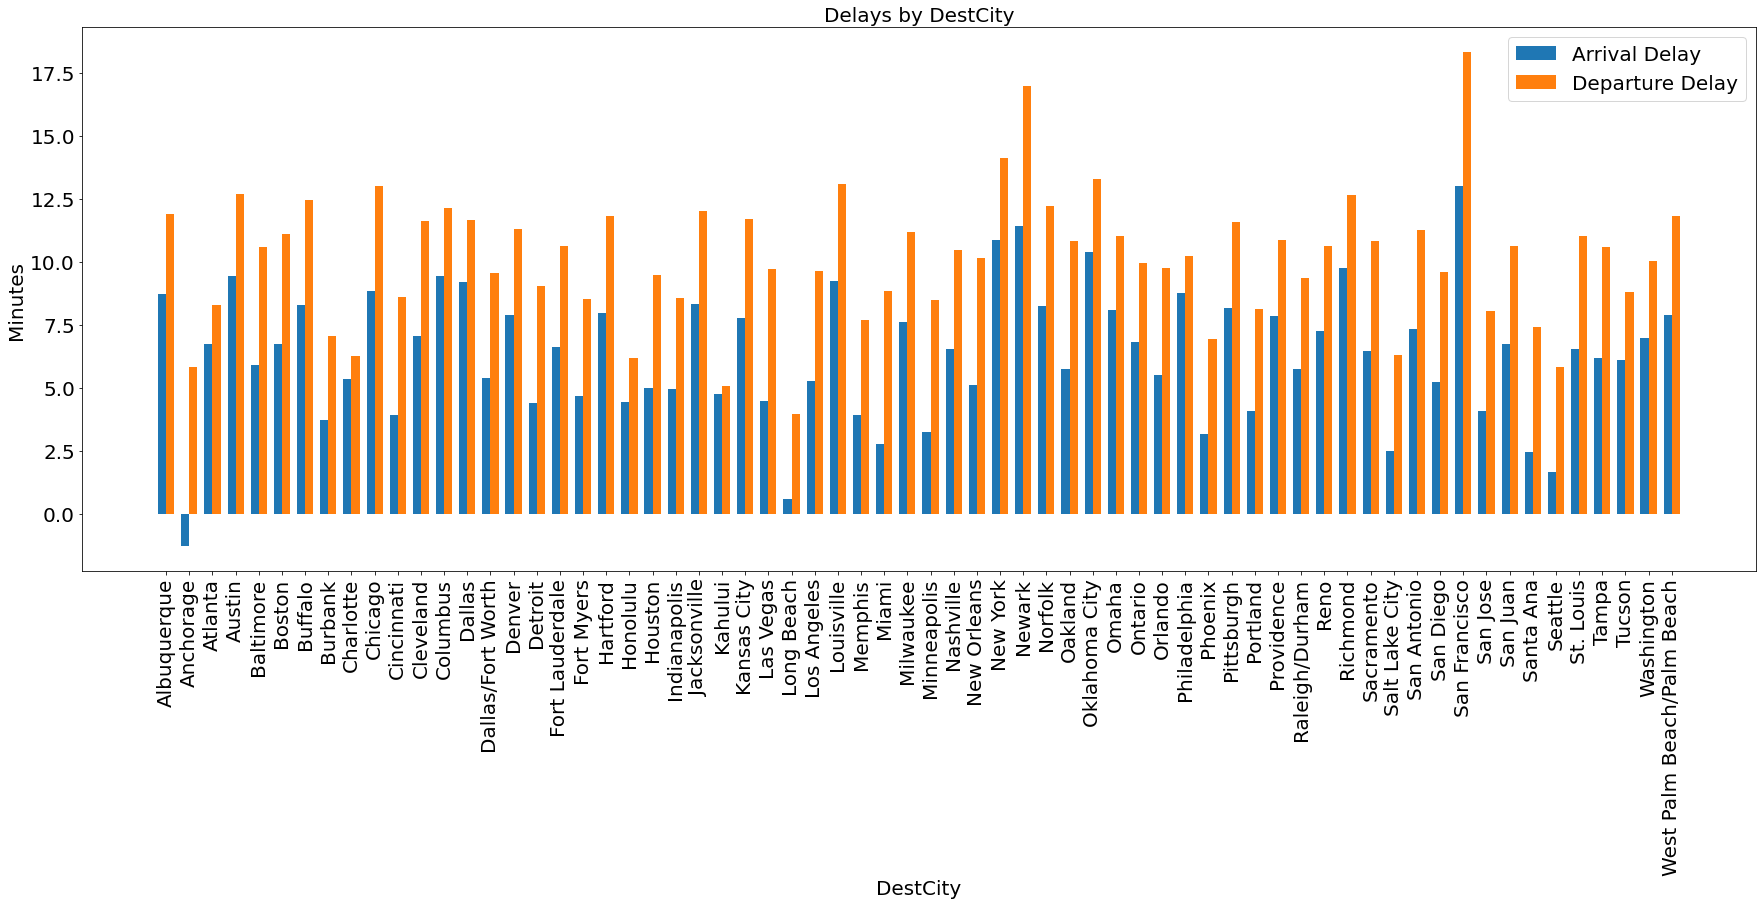

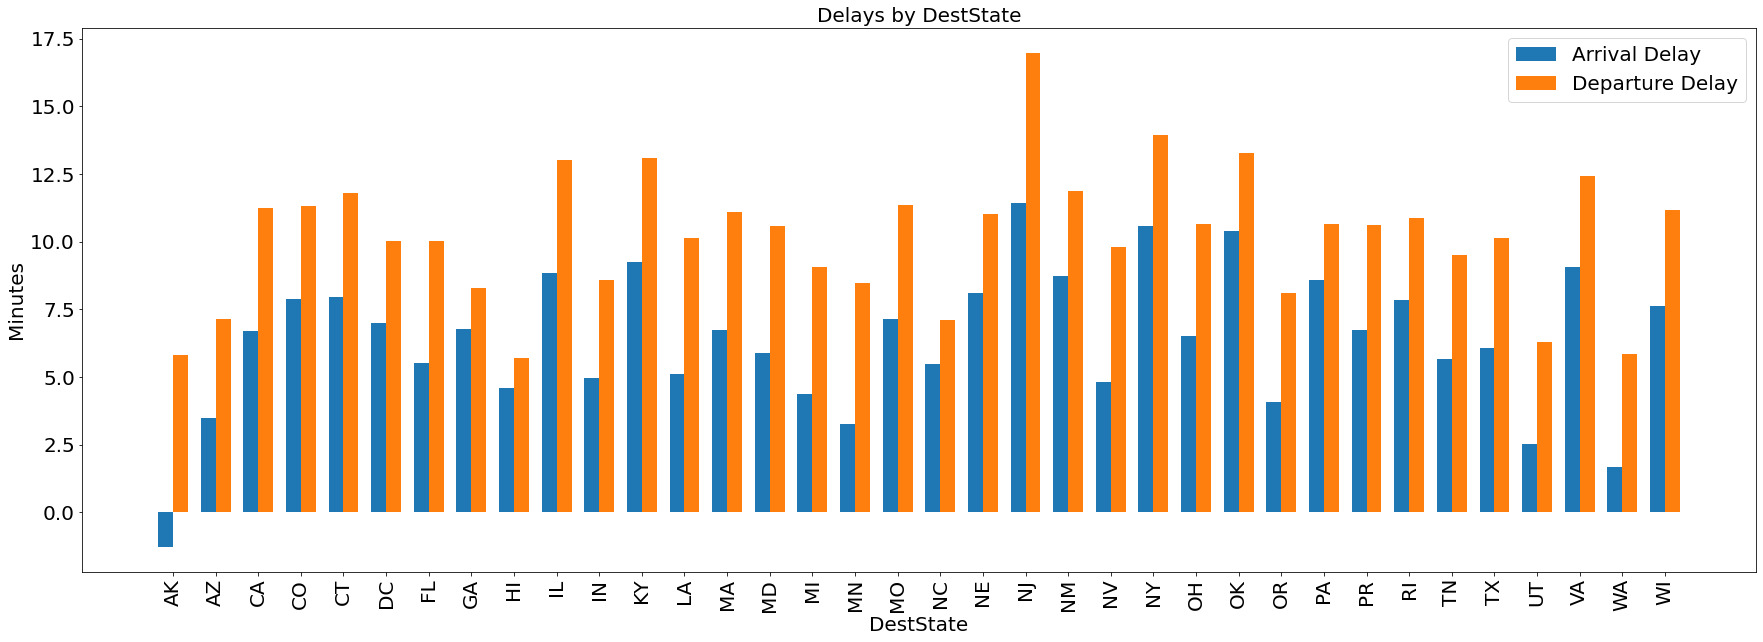

In [107]:
cuts = df_flights.columns.to_list()[:13]

for cut in cuts:
    delays_cut(df_flights[cut])

In [108]:
df_flights.groupby('Route')[['DepDelay','ArrDelay']].min().reset_index().min()

Route       Albuquerque International Sunport - Baltimore/...
DepDelay                                                  -63
ArrDelay                                                  -75
dtype: object

In [109]:
df_flights.groupby('Route')[['DepDelay','ArrDelay']].max().reset_index().max()

Route       William P Hobby - Will Rogers World
DepDelay                                   1425
ArrDelay                                   1440
dtype: object

1. On average, the longest delays were in June (arrival delays of just under 14 min, and departure delays of about 16 minutes), commonly on Thursday when the average arrival and departure delays were just under 12 and 14 minutes respectively.
2. The carrier with the longest delays was Envoy Air(MQ) with average arrival delays of over 12 minutes and departure delays of more than 14 minutes.
3. Passengers experienced the longest delays when they flew from Chicago O'Hare Int. in Chicago, Illinois and arrived at San Francisco Int. in San Francisco.
4. However, the destination state with the longest average delays was New Jersey
5. The route where planes flew in front of the schedule is **Albuquerque International Sunport - Baltimore/Washington International Thurgood Marshall**
6. The route with the greatest delays is **William P Hobby - Will Rogers World**


> **Note** In some cases the average times are negative. This is because we look at all the numbers including flights that are on time or come earlier. This means we must look at long delays separately.


Text(0.5, 0.98, 'Long/short delays and cancellations')

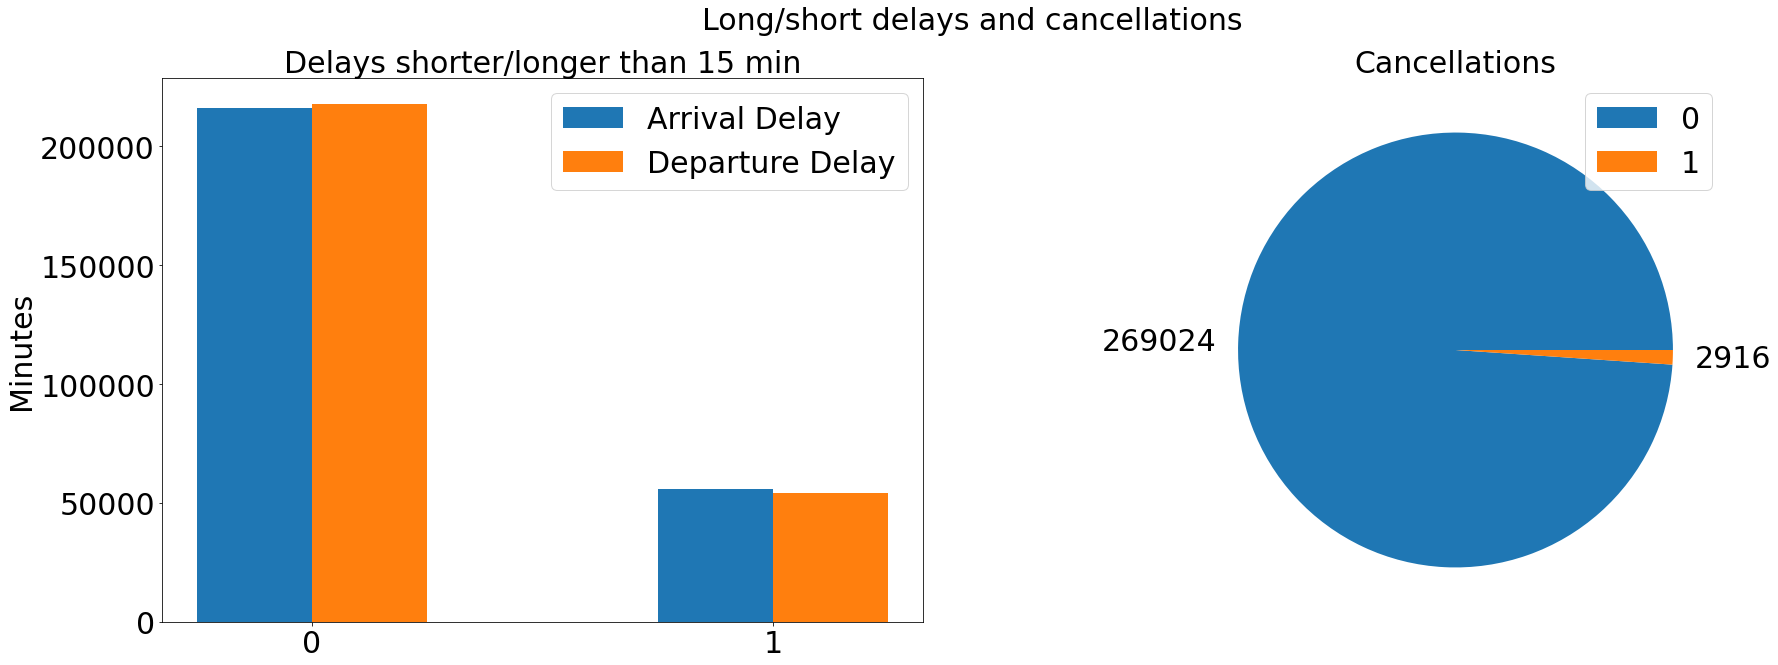

In [110]:
# look at mean delays less and momre than 15 minutes and cancelations
# first prepare data

del15 = df_flights['ArrDel15'].value_counts().reset_index().merge(df_flights['DepDel15'].value_counts().reset_index(), on='index')

cancelled = df_flights['Cancelled'].value_counts()

# Create a figure with 2 subplots
fig, plt = plt.subplots(1, 2, figsize=(30,10))

# create grouped barchart
x = np.arange(len(del15))
width = 0.25
plt[0].bar(x - width/2, del15['ArrDel15'], width, label='Arrival Delay')
plt[0].bar(x + width/2, del15['DepDel15'], width, label='Departure Delay')

plt[0].set_ylabel('Minutes', fontsize=30)
plt[0].set_title('Delays shorter/longer than 15 min', fontsize=30)
plt[0].set_xticks(x, del15['index'])
plt[0].tick_params(axis='both', which='both', labelsize=30)
plt[0].legend(fontsize=30)

# plot a pie chart
plt[1].pie(cancelled, labels=cancelled, textprops={'fontsize': 30})
plt[1].set_title('Cancellations', fontsize=30)
plt[1].legend(cancelled.keys().tolist(), fontsize=30)

# set the title for the whole chart
fig.suptitle('Long/short delays and cancellations', fontsize=30)


Long delays (over 15 minutes) and cancellations were relatively uncommon. Only about 50000 flights out of 270000 were delayed for longer than 15 minutes. Even fewer flights, just under 3000, were cancelled.

> Let's look at the average long delays.

In [111]:
def long_delays_cut(cut):
    # average delays longer than 15 min by different cuts using pd.DataFrame.plot
    long_arrdel = df_flights[df_flights['ArrDel15'] == 1].groupby(df_flights[cut])['ArrDelay'].mean().reset_index()
    long_depdel = df_flights[df_flights['DepDel15'] == 1].groupby(df_flights[cut])['DepDelay'].mean().reset_index()
    long_del = long_arrdel.merge(long_depdel, on=cut).set_index(cut)
    fig = long_del.plot.bar(rot=90, color={'ArrDelay':'#0095A8', 'DepDelay':'#FF0000'}, figsize=(30,10), fontsize=20)


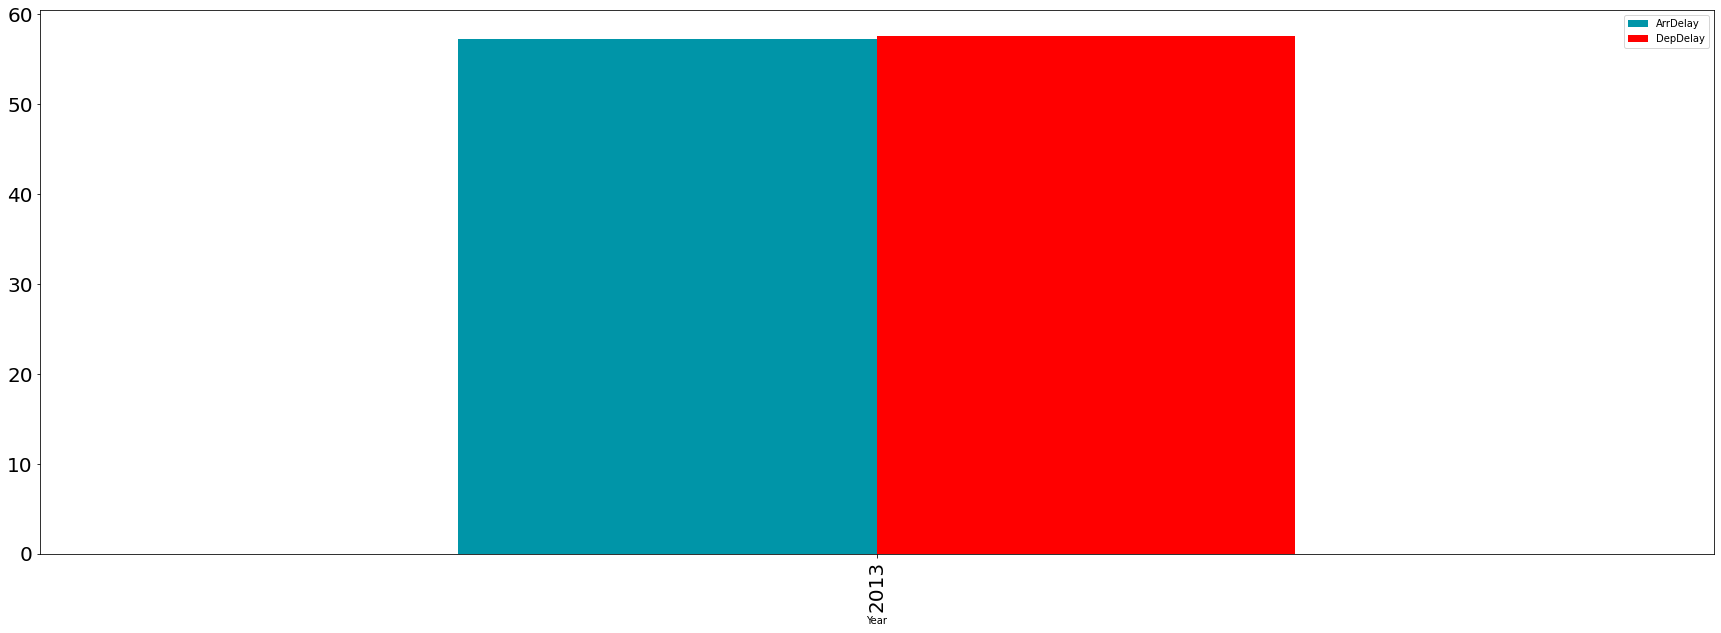

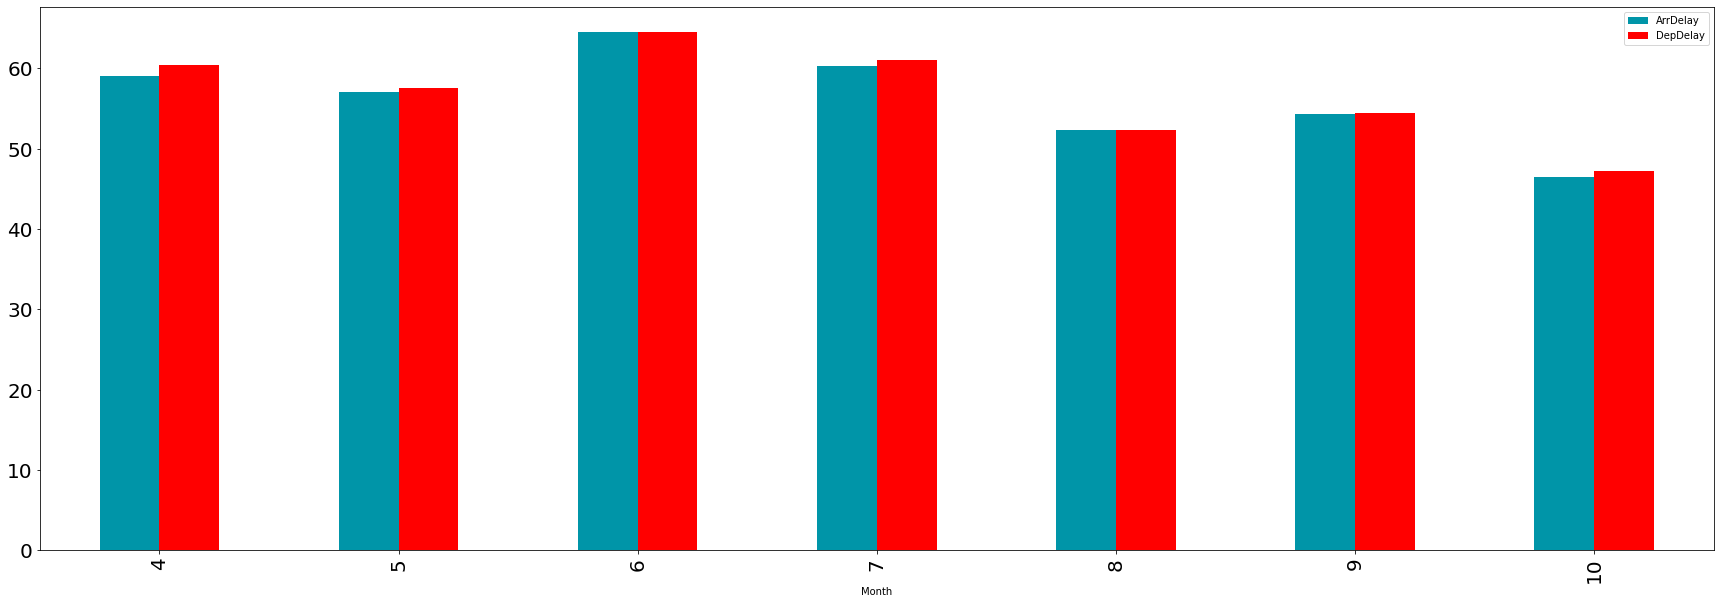

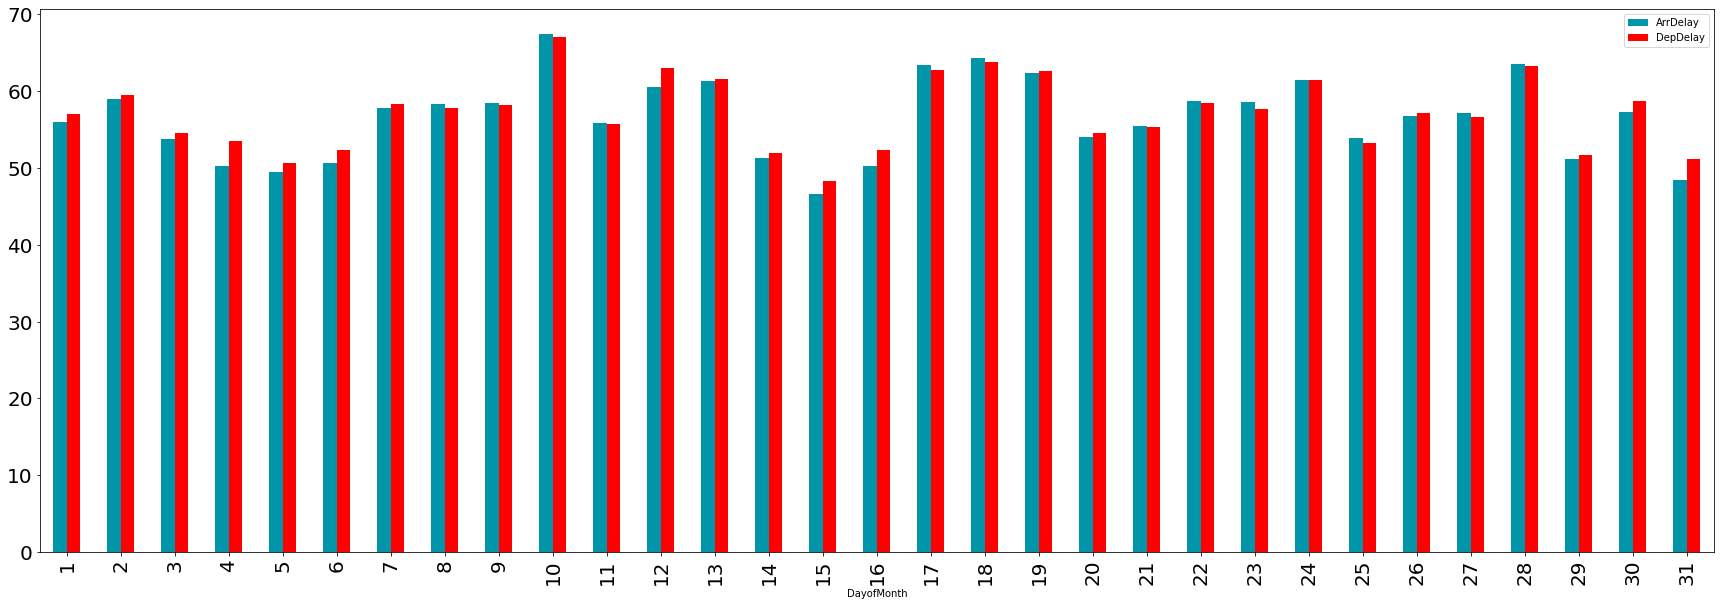

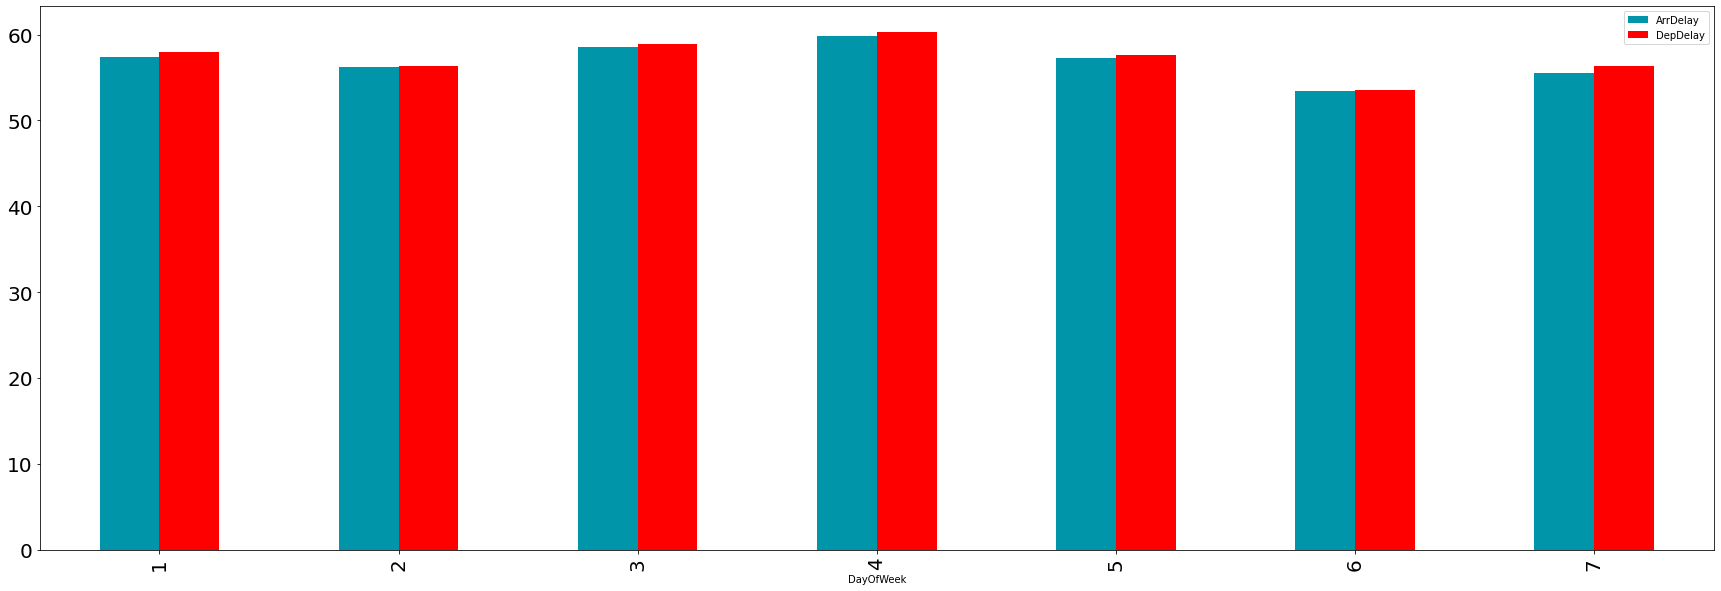

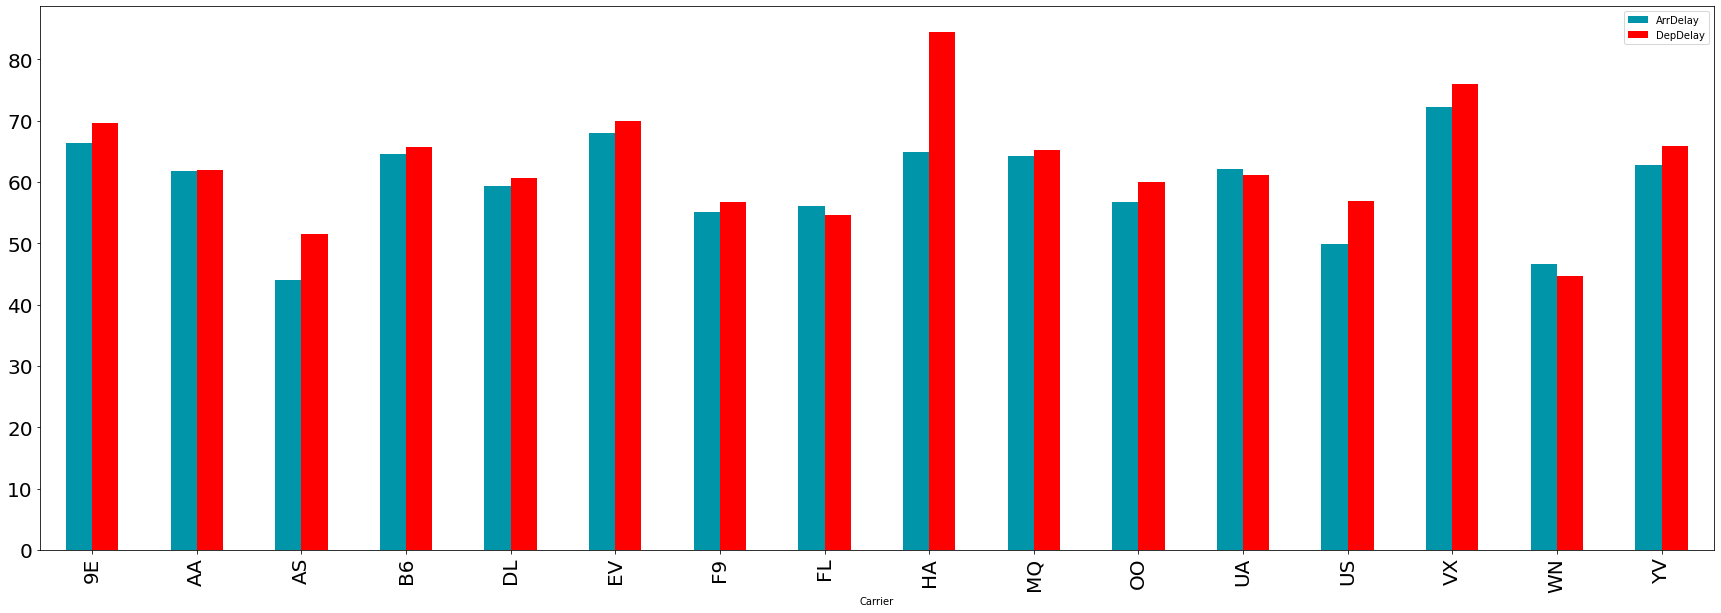

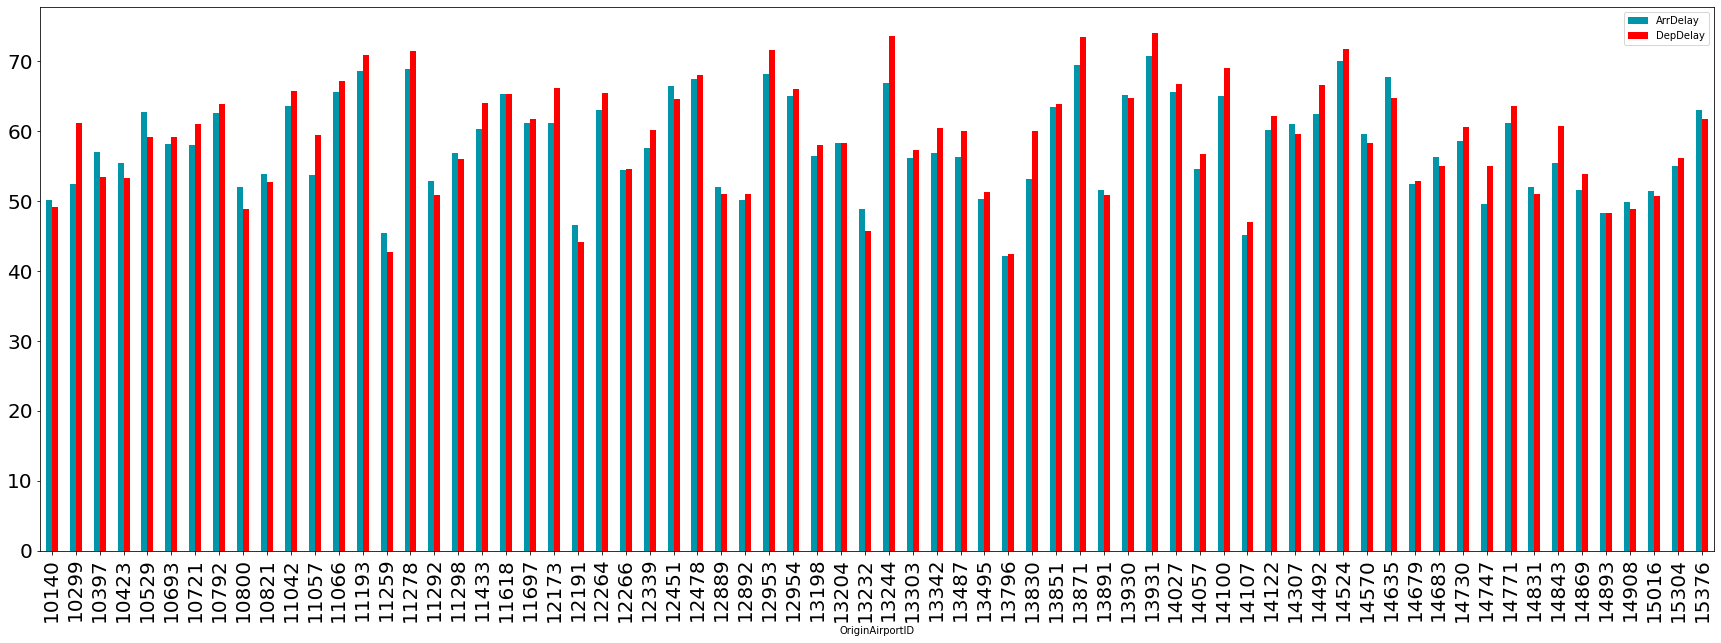

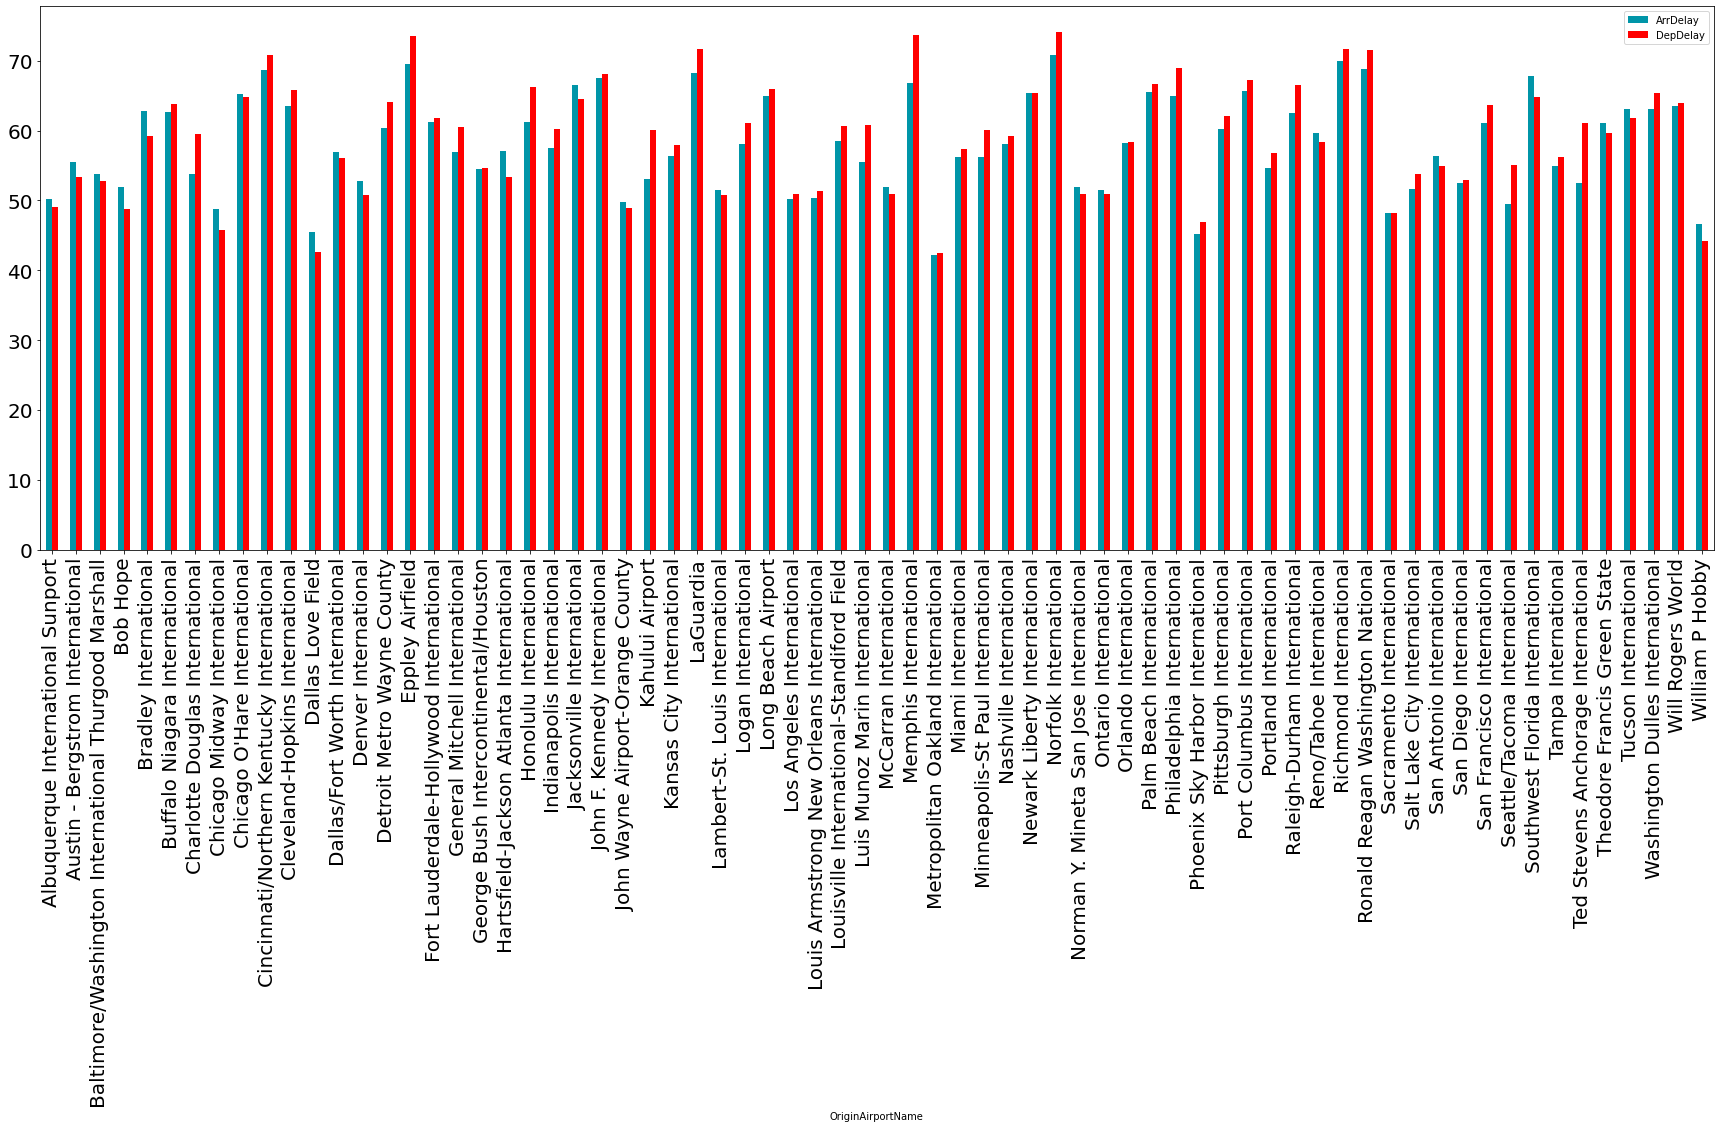

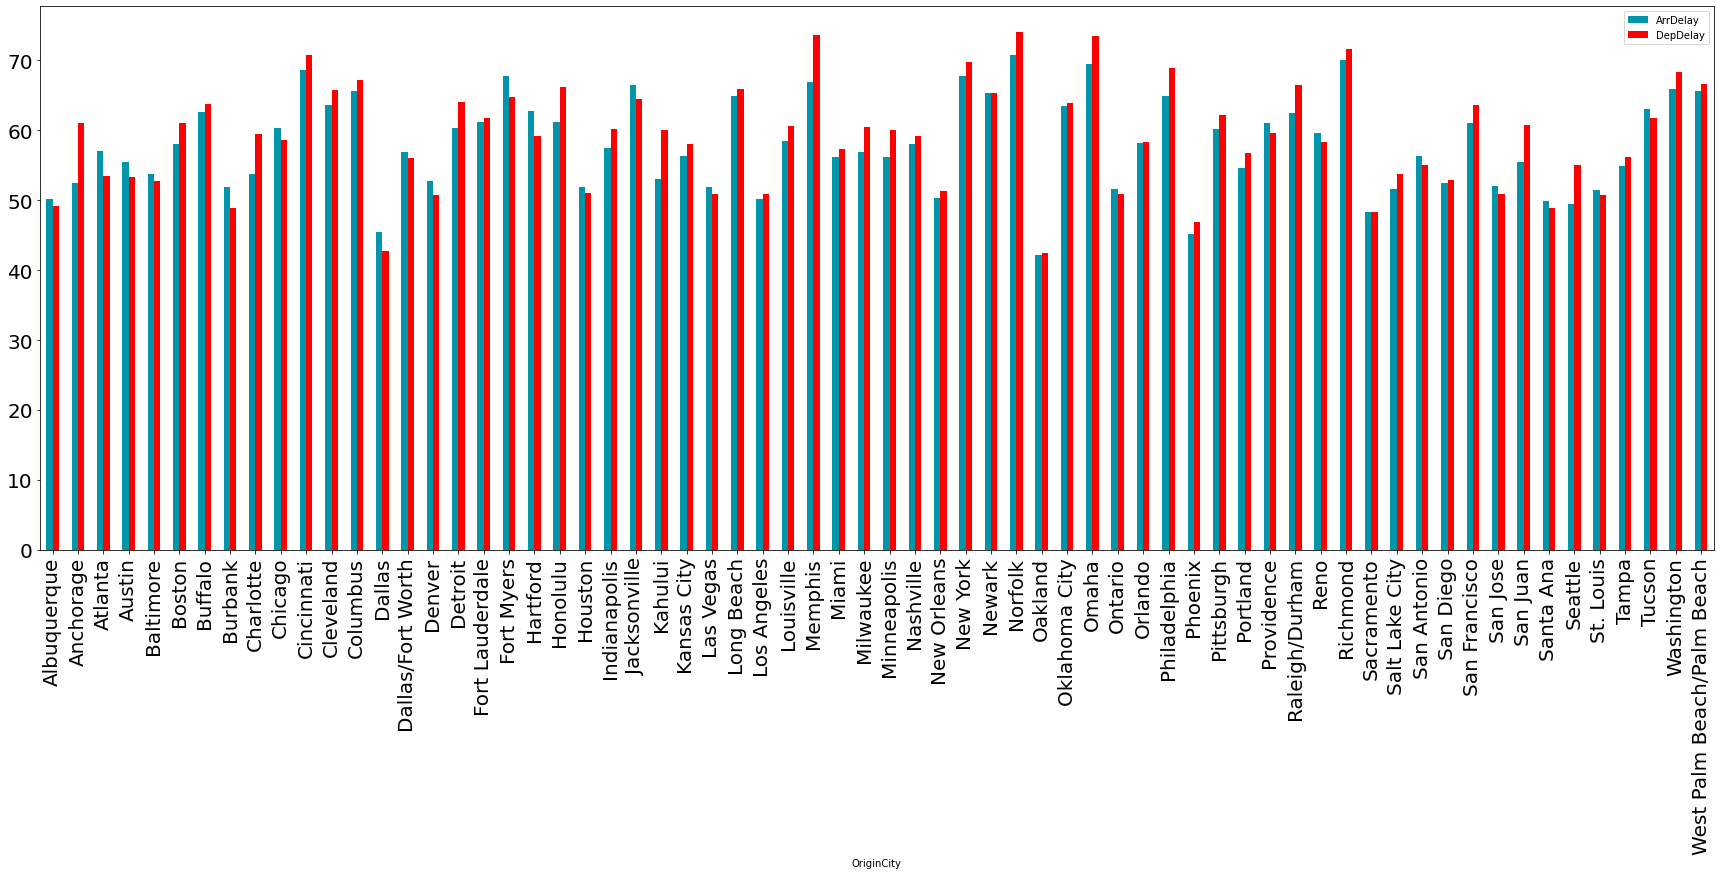

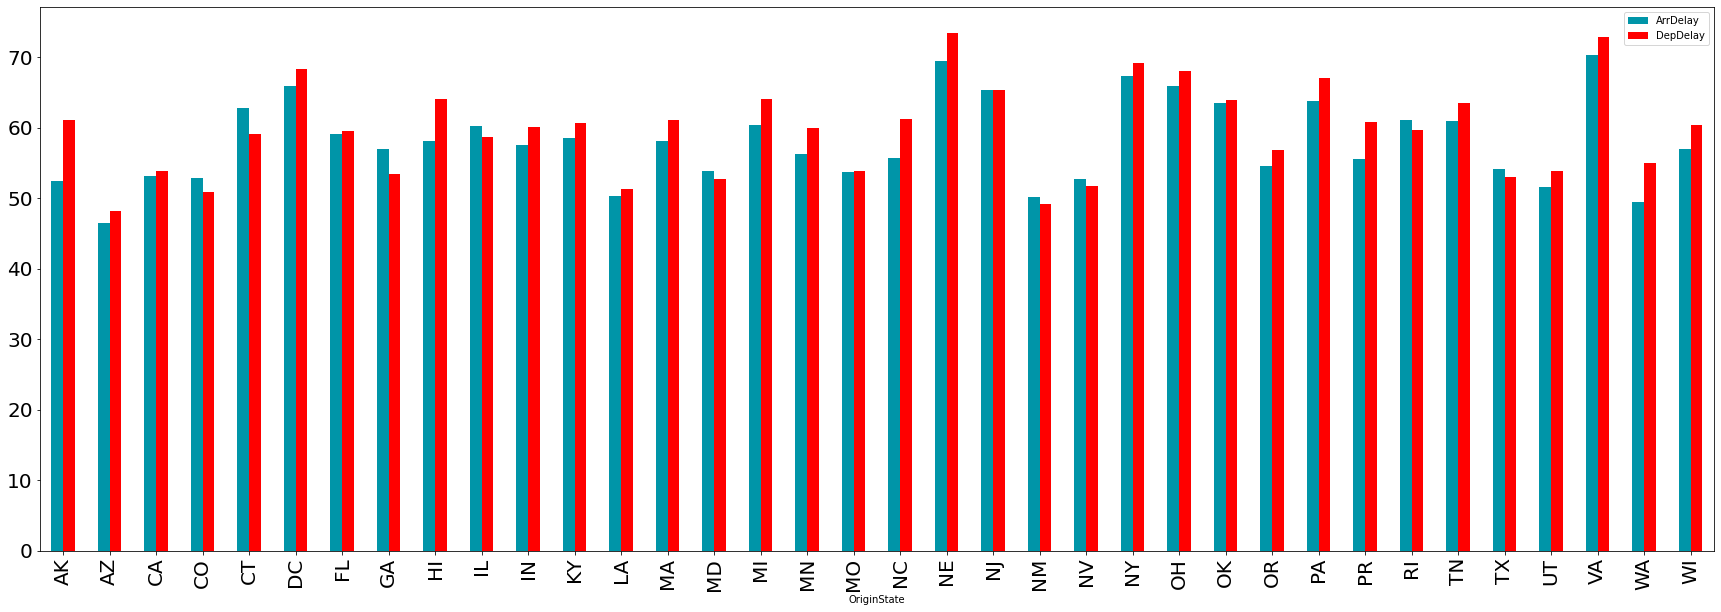

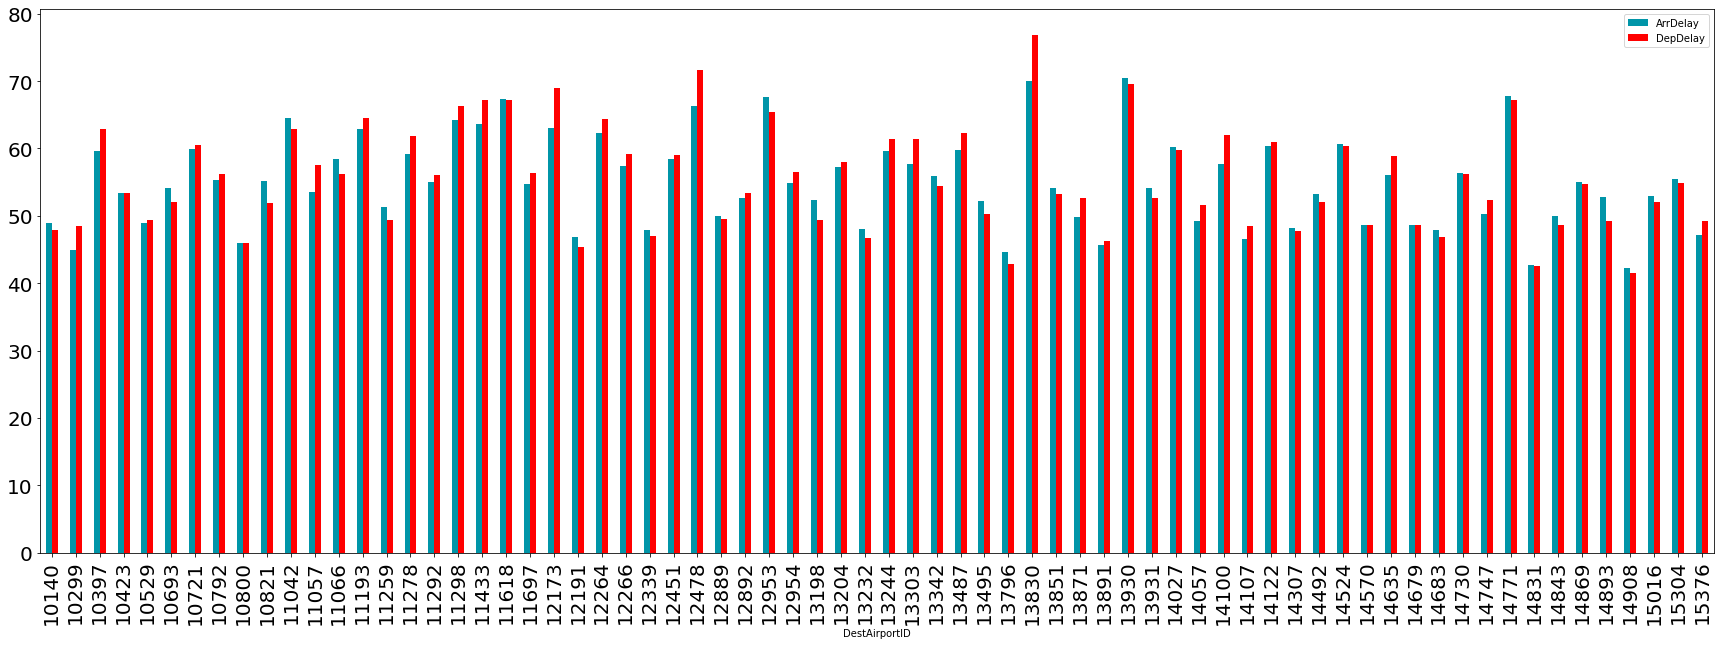

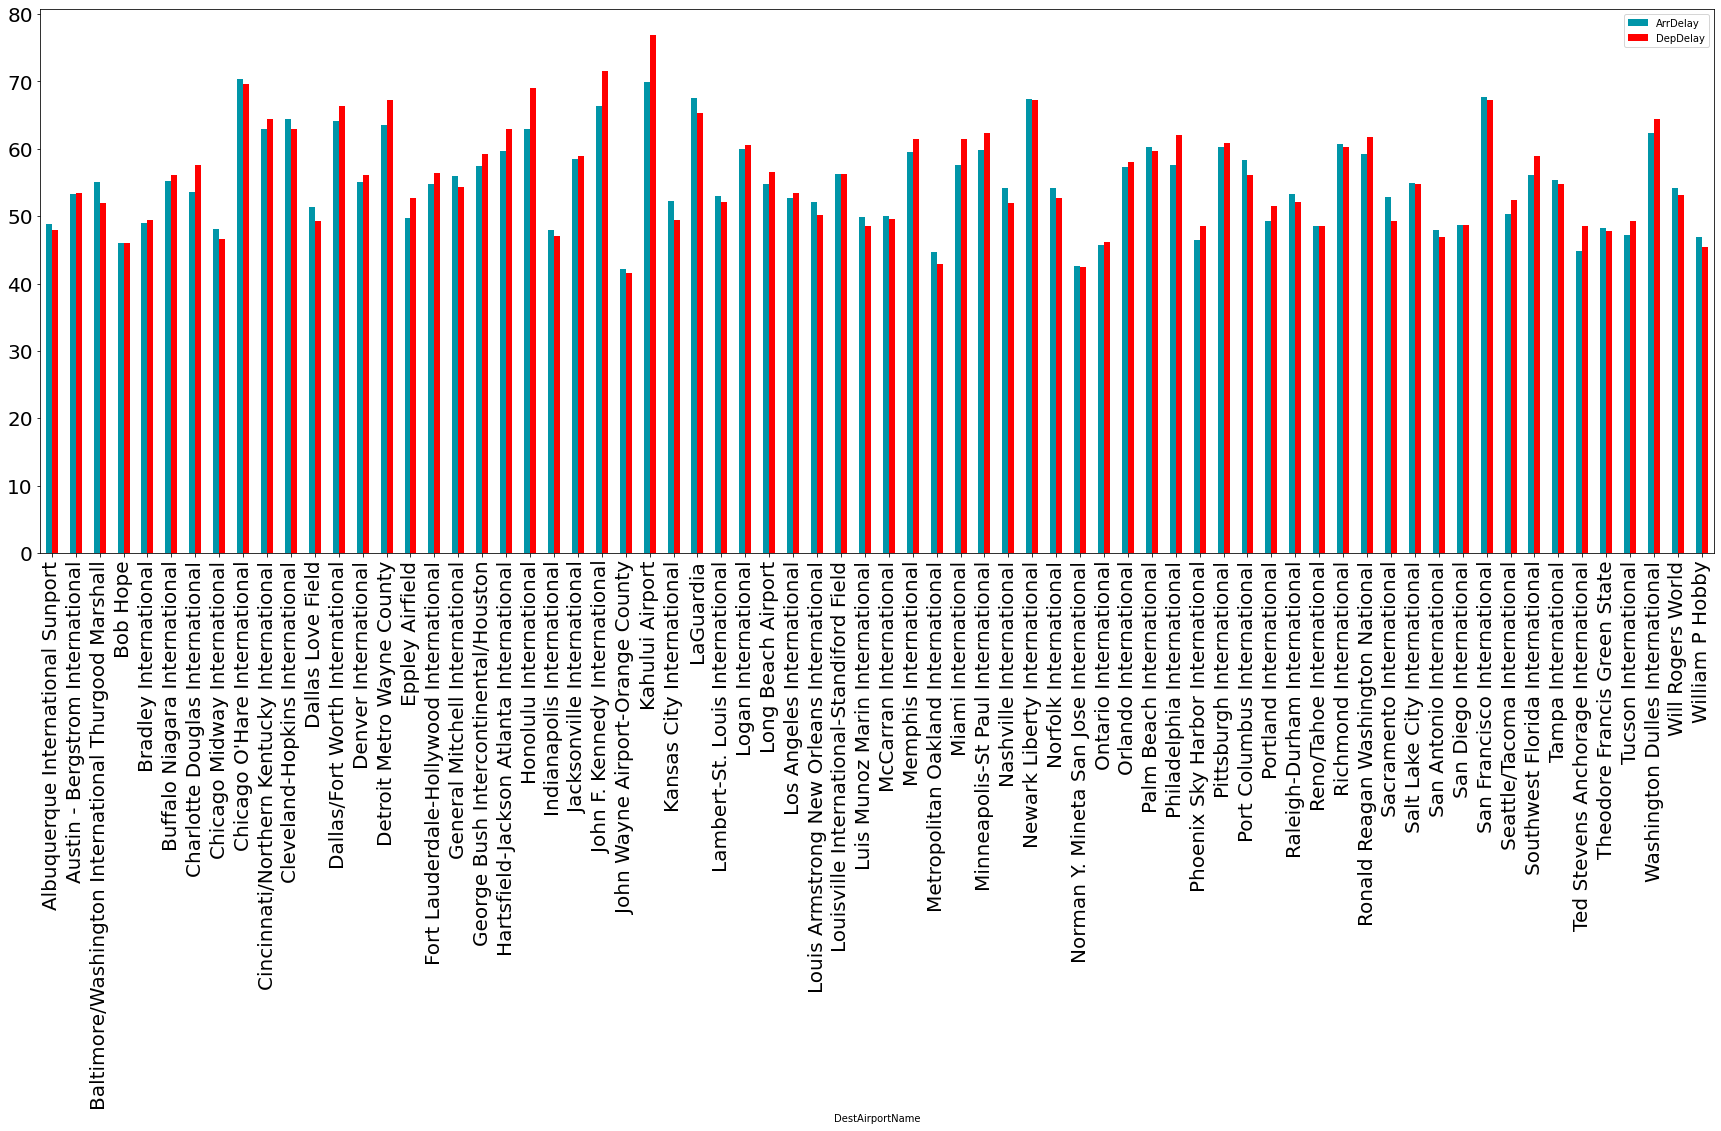

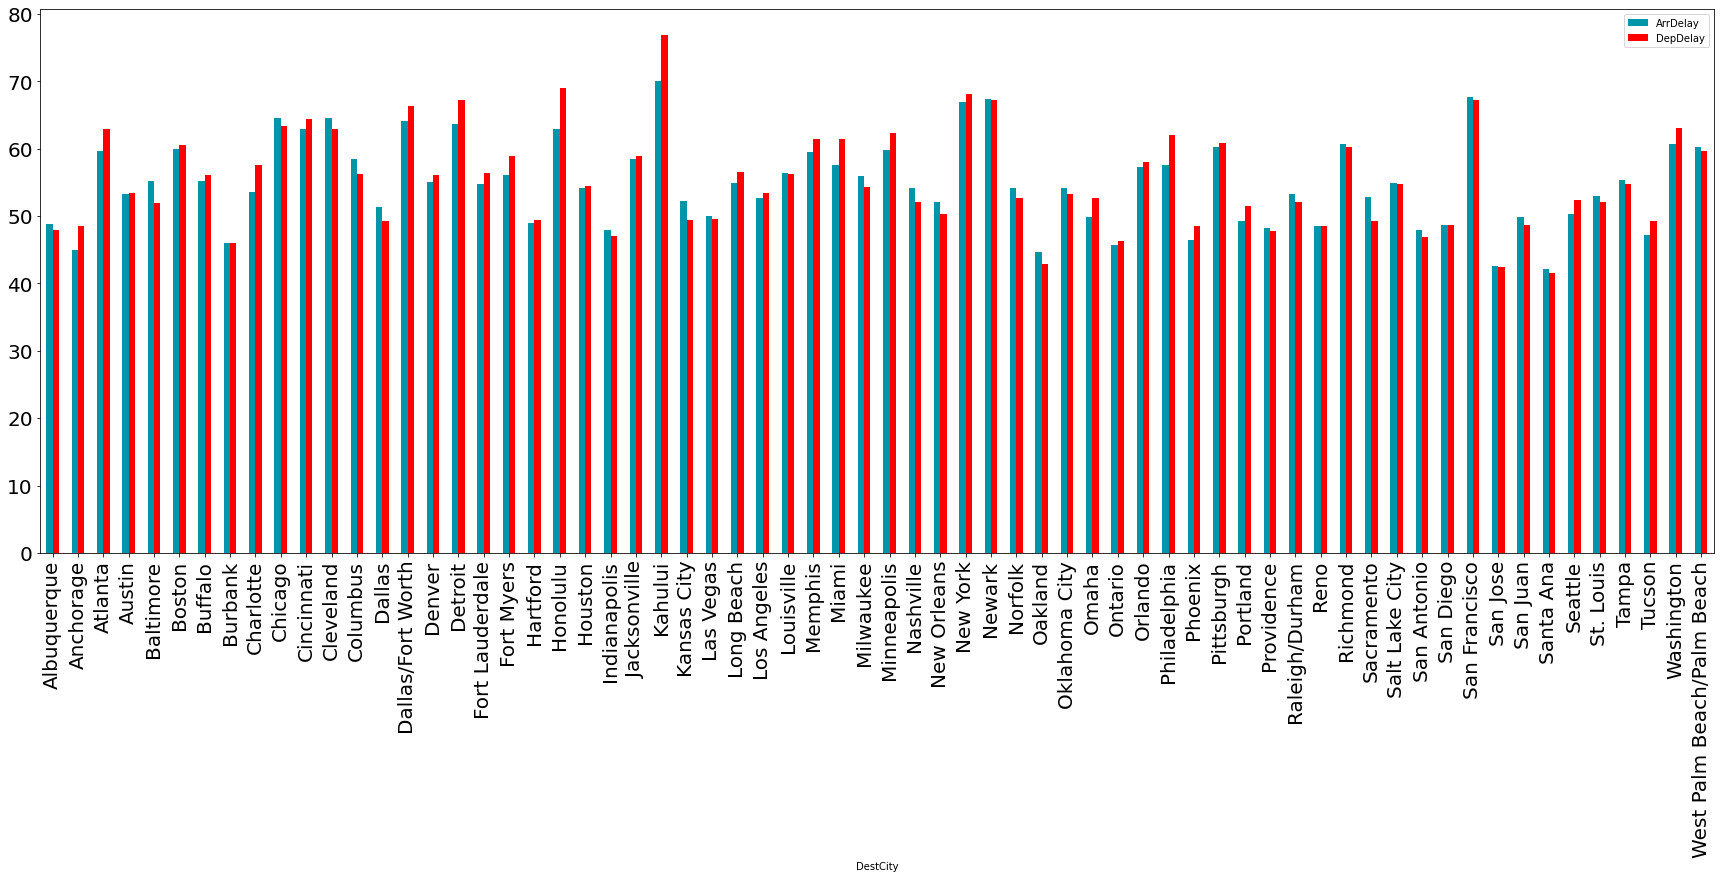

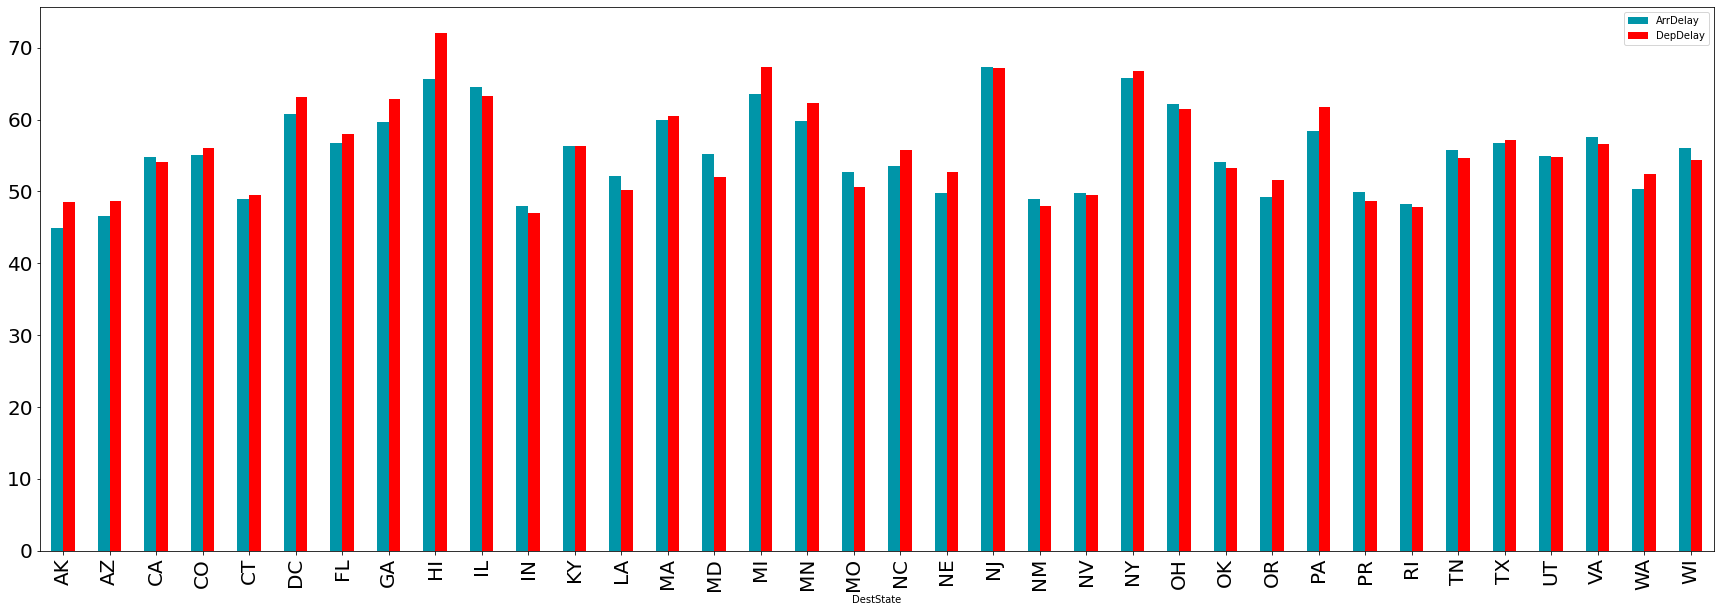

In [112]:
for cut in cuts:
    long_delays_cut(cut)

1. On average long delays were just under 1 hour.
2. The longest average delays were in **June** in the middle of the week.
3. Looking at the average over 15 minute delay times by carrier, it is clear that on average **Hawaiian Airlines** had the longest departure delays and **Virgin America** had the longest arrival delays.
4. Passengers experienced delays in departures of over 1 hour and 15 minutes when they flew from **Norfolk Int. airport** in **Virginia**.
5. Planes were usually delayed by over an hour and 10 minutes when they arrived at **Kahului Airport** in **Hawaii**.

> Now let's look at flight time deviations over the year

<AxesSubplot: xlabel='Date'>

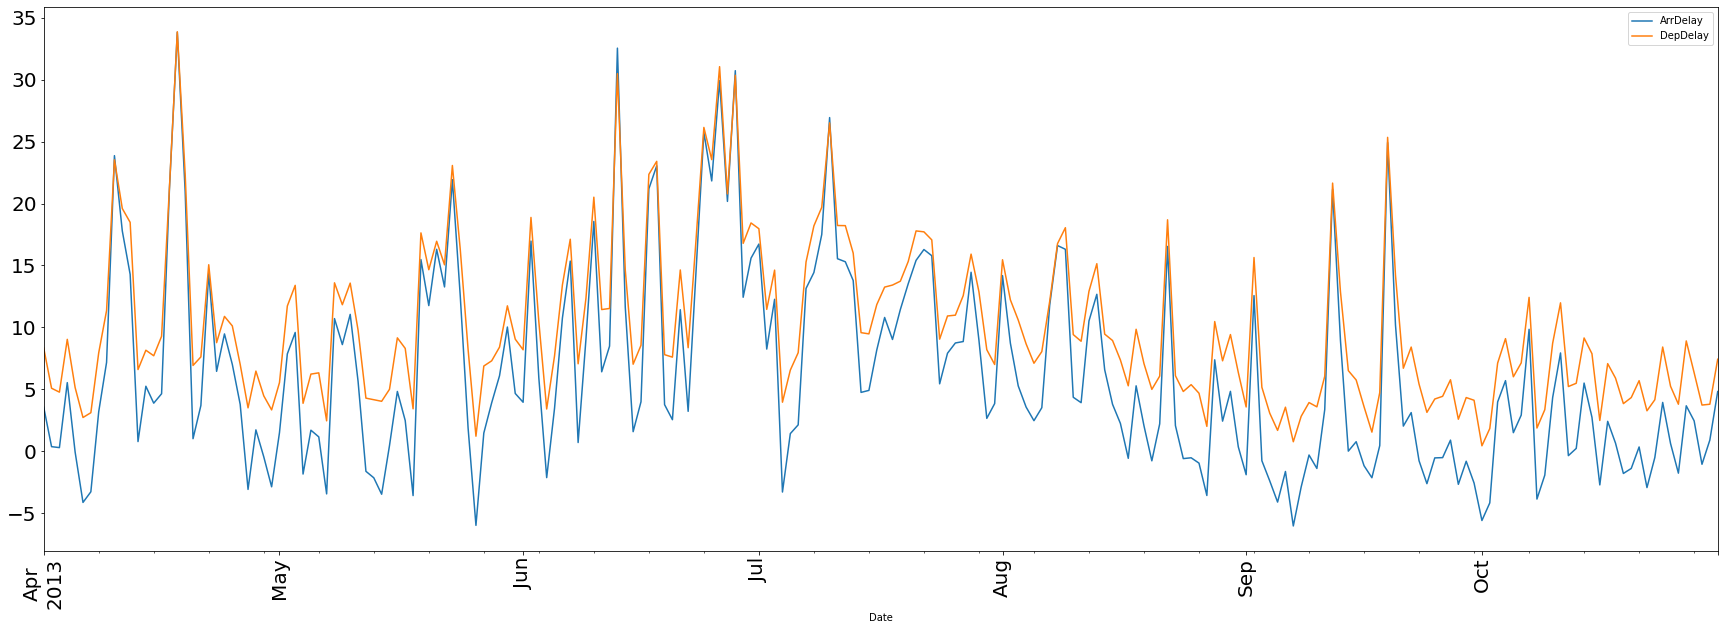

In [113]:
dev_by_date = df_flights.groupby(df_flights['Date'])[['ArrDelay', 'DepDelay']].mean()
dev_by_date.plot.line(rot=90, figsize=(30,10), fontsize=20)

It is immediatelly noticeable that the average delay times for both departures and arrivals followed a similar pattern. This might indicate that there is a correlation between the two.

The peak in flight delays was in the **middle of April** with the average of over half an hour.

In the first **half of September** and **second half of May** the planes arrived more than 5 minutes ahead of the schedule.

Departures were either on time or late.

> Let's look at long delays only

<AxesSubplot: xlabel='Date'>

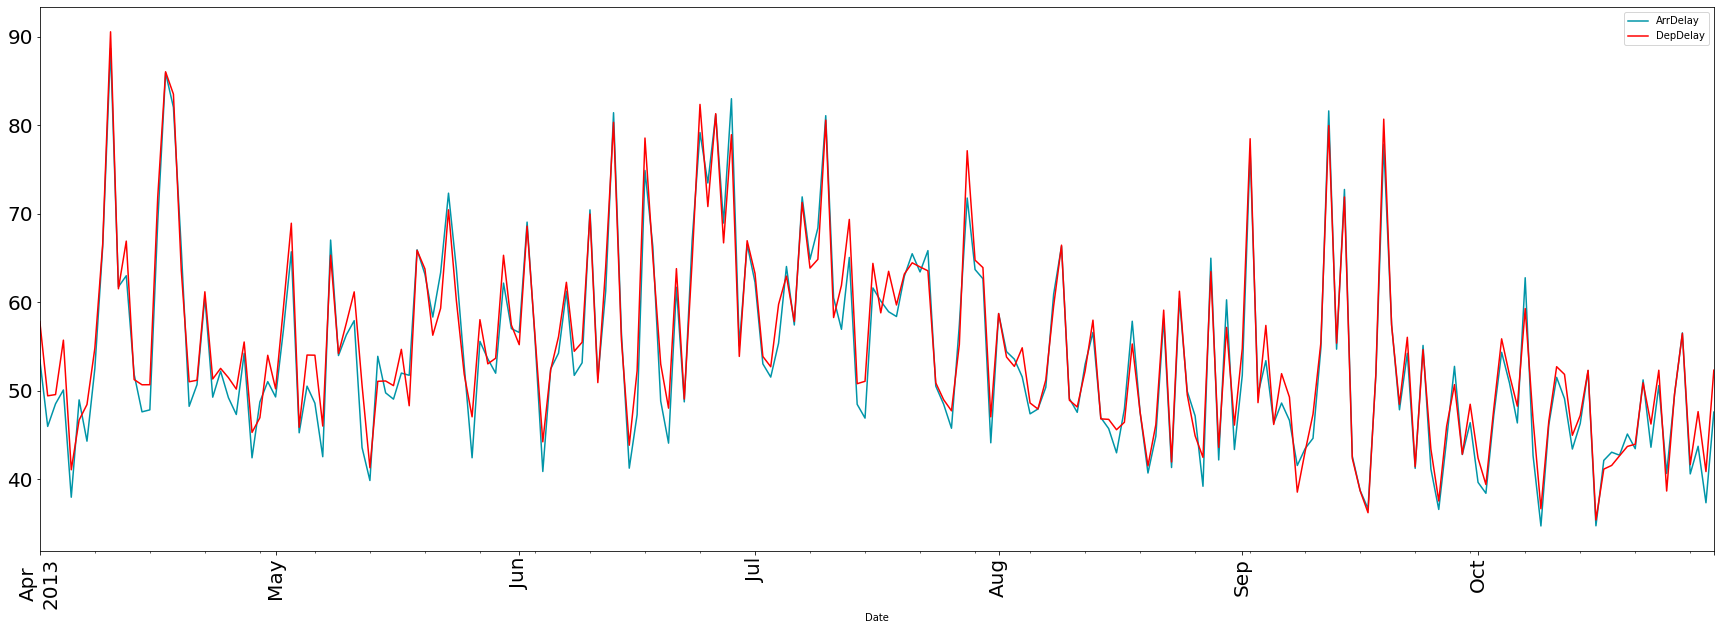

In [114]:
long_arrdel = df_flights[df_flights['ArrDel15'] == 1].groupby(df_flights['Date'])['ArrDelay'].mean().reset_index()
long_depdel = df_flights[df_flights['DepDel15'] == 1].groupby(df_flights['Date'])['DepDelay'].mean().reset_index()
del_by_date = long_arrdel.merge(long_depdel, on='Date').set_index('Date')
del_by_date.plot.line(rot=90, figsize=(30,10), color={'ArrDelay':'#0095A8', 'DepDelay':'#FF0000'}, fontsize=20)

Looking at long delays, the similar patterns are even clearer.

On average long delays of over 1 and a half hours were at the **beginning of April**

Short delays of about 15 minutes were common in the **middle of September**

# 3. Statistical analysis

### Data distributuon for departure delay times

In [115]:
def distribution(data):

    print('Distribution for {}'.format(data.name))
    from matplotlib import pyplot as plt
    #Statistics
    min = data.min()
    max = data.max()
    mean = data.mean()
    med = data.median()
    mod = data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min,
                                                                                            mean,
                                                                                            med,
                                                                                            mod,
                                                                                            max))

    # Create a figure with 2 plots
    fig, ax = plt.subplots(2, 1, figsize=(30, 15))

    #plot a histogram
    ax[0].hist(data)
    ax[0].set_ylabel('Frequency', fontsize=20)

    # add lined for statistics
    ax[0].axvline(x=min, color='grey', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean, color='cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med, color='red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod, color='yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max, color='grey', linestyle='dashed', linewidth = 2)
    ax[0].tick_params(axis='both', which='both', labelsize=20)


    #plot box
    ax[1].boxplot(data, vert=False)
    ax[1].set_xlabel('Value', fontsize=20)
    ax[1].tick_params(axis='both', which='both', labelsize=20)


    #Add title
    fig.suptitle('Data Distribution for {}'.format(data.name), fontsize=20)

Distribution for DepDelay
Minimum:-63.00
Mean:10.35
Median:-1.00
Mode:-3.00
Maximum:1425.00



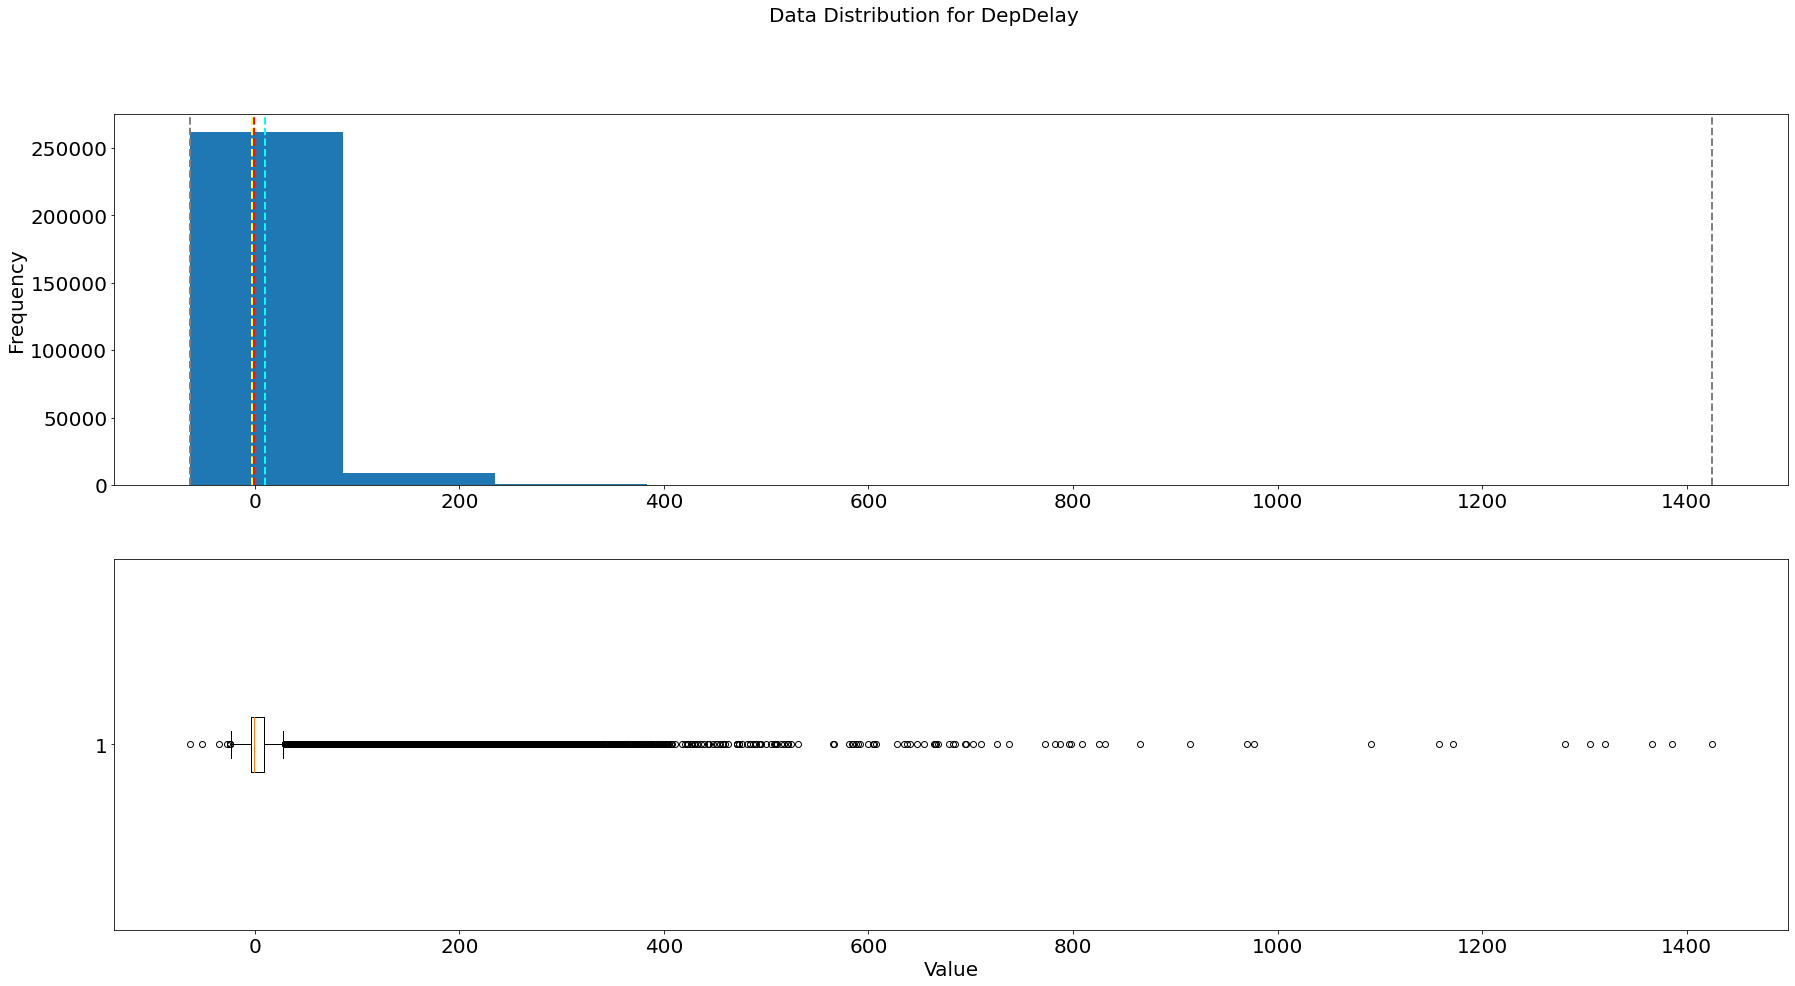

In [116]:
distribution(df_flights['DepDelay'])

(258149, 18)
Distribution for DepDelay
Minimum:-19.00
Mean:3.92
Median:-1.00
Mode:-3.00
Maximum:69.00



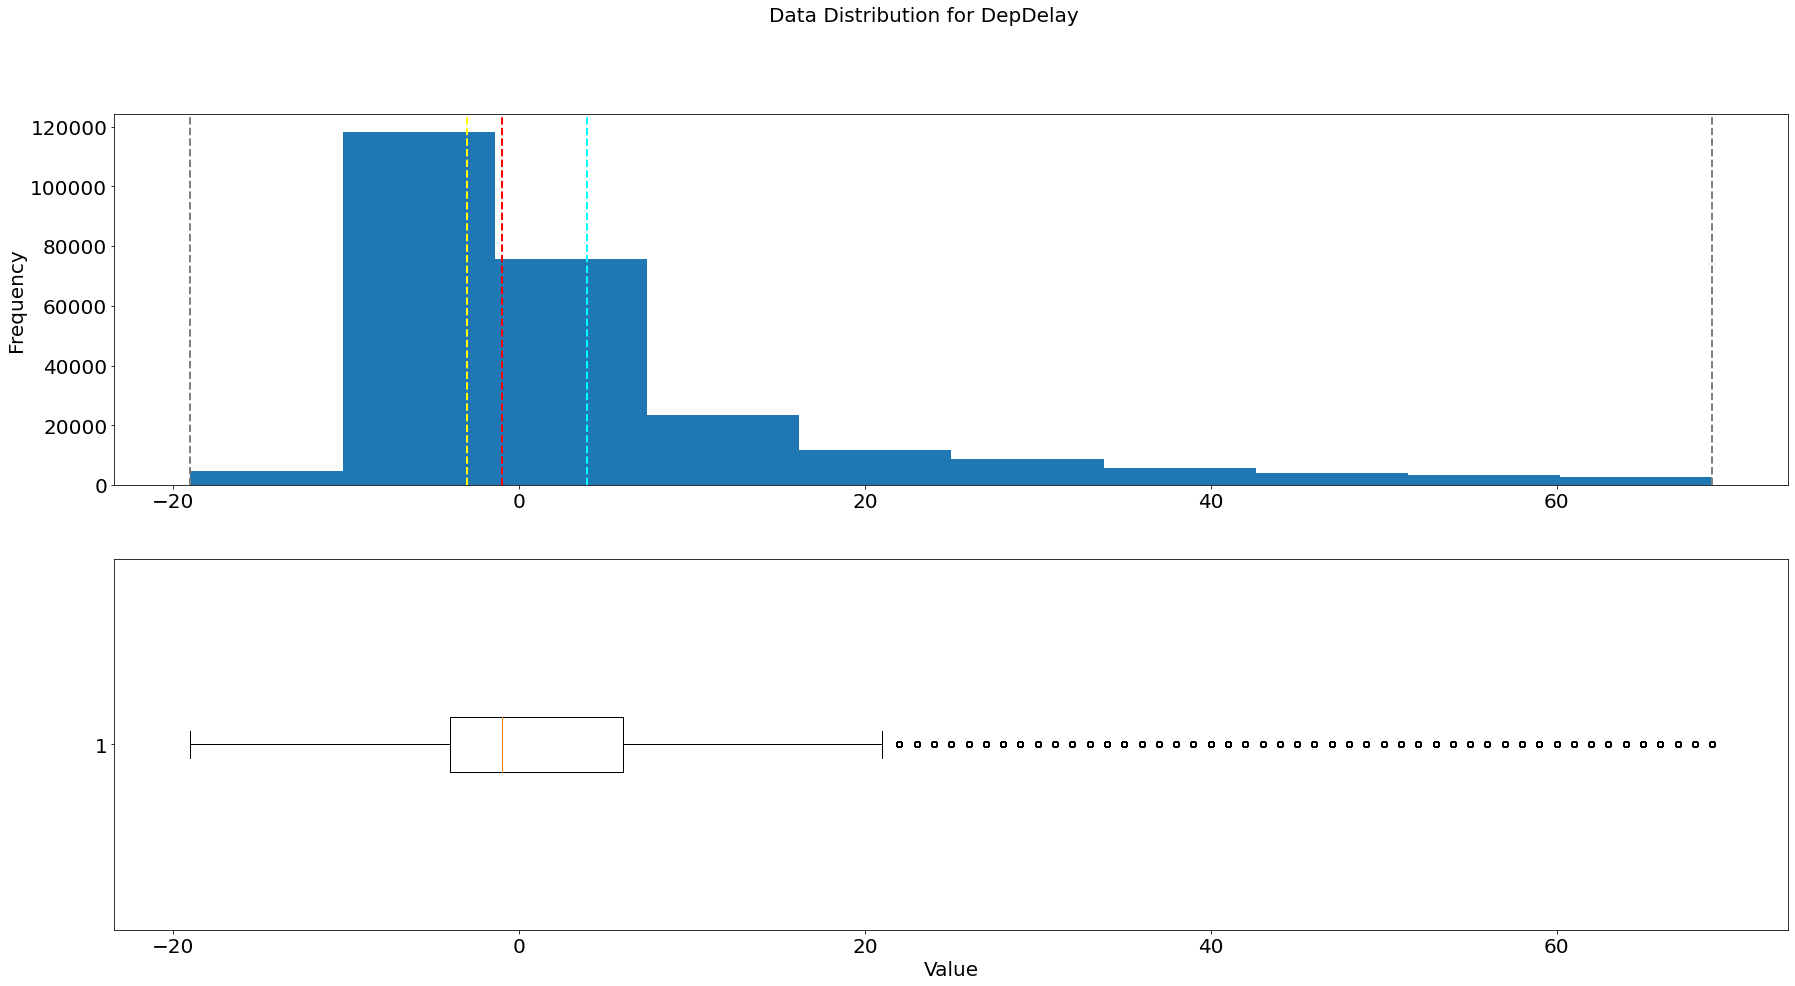

In [117]:
# it's more logical to separate the df into one that has data about departure delays
# to get rid of outliers at the upper and the lower end let's adjust the quantiles
dep_qup = df_flights['DepDelay'].quantile(0.95)
dep_qlow = df_flights['DepDelay'].quantile(0.0001)
depdel_flights = df_flights[['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'Carrier',
       'OriginAirportID', 'OriginAirportName', 'OriginCity', 'OriginState',
       'DestAirportID', 'DestAirportName', 'DestCity', 'DestState',
       'CRSDepTime', 'DepDelay', 'DepDel15', 'CRSArrTime', 'Date']]
# and improve its distribution
depdel_flights = depdel_flights[(depdel_flights['DepDelay'] > dep_qlow) & (depdel_flights['DepDelay'] < dep_qup)]
print(depdel_flights.shape)
distribution(depdel_flights['DepDelay'])

In [118]:
def density(data):

    from matplotlib import pyplot as plt

    fig = plt.figure(figsize=(30,10))

    data.plot.density()

    plt.title('Data Density', fontsize=20)

    plt.axvline(x=data.mode()[0], color='yellow', linestyle='dashed', linewidth = 2)
    plt.axvline(x=data.mean(), color='cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=data.median(), color='red', linestyle='dashed', linewidth = 2)
    plt.tick_params(axis='both', which='both', labelsize=20)


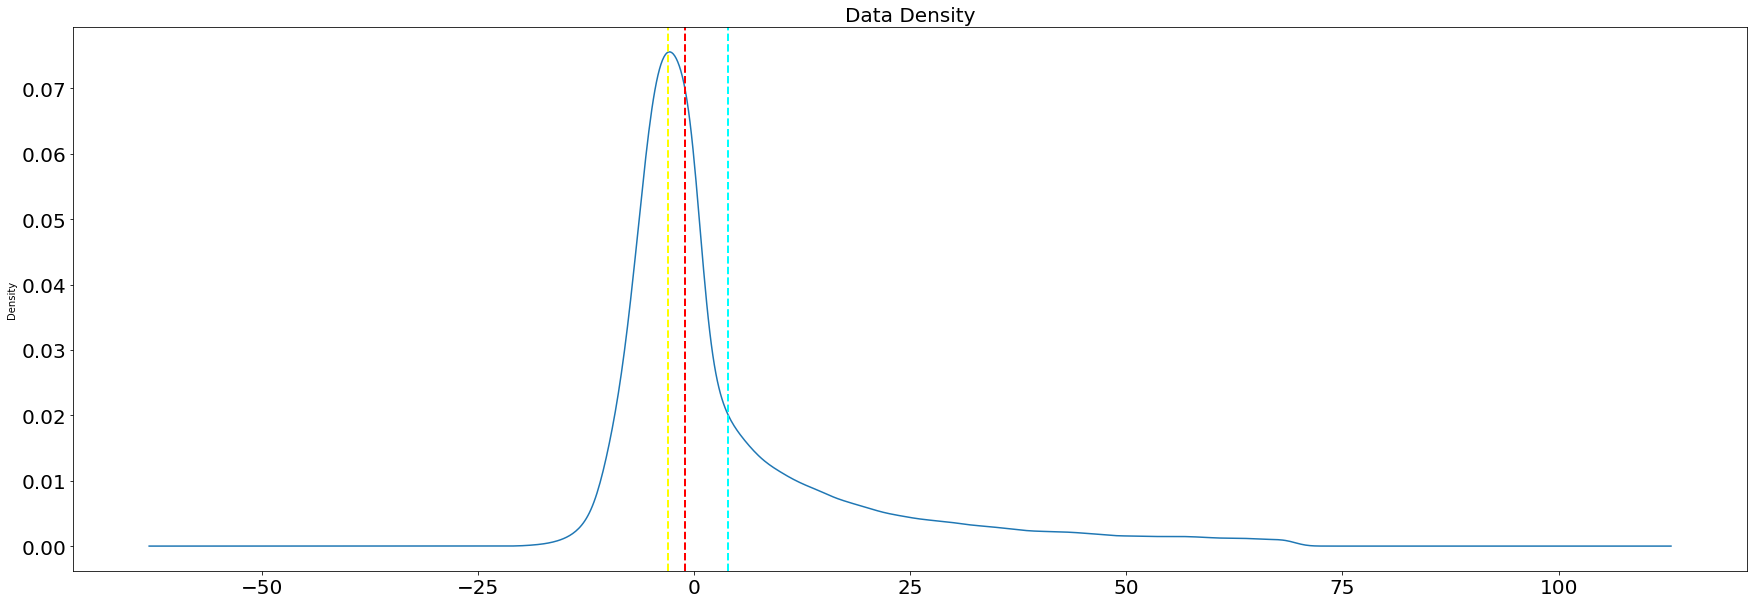

In [119]:
density(depdel_flights['DepDelay'])

### Data distribution for arrival delay times

Distribution for ArrDelay
Minimum:-75.00
Mean:6.50
Median:-3.00
Mode:0.00
Maximum:1440.00



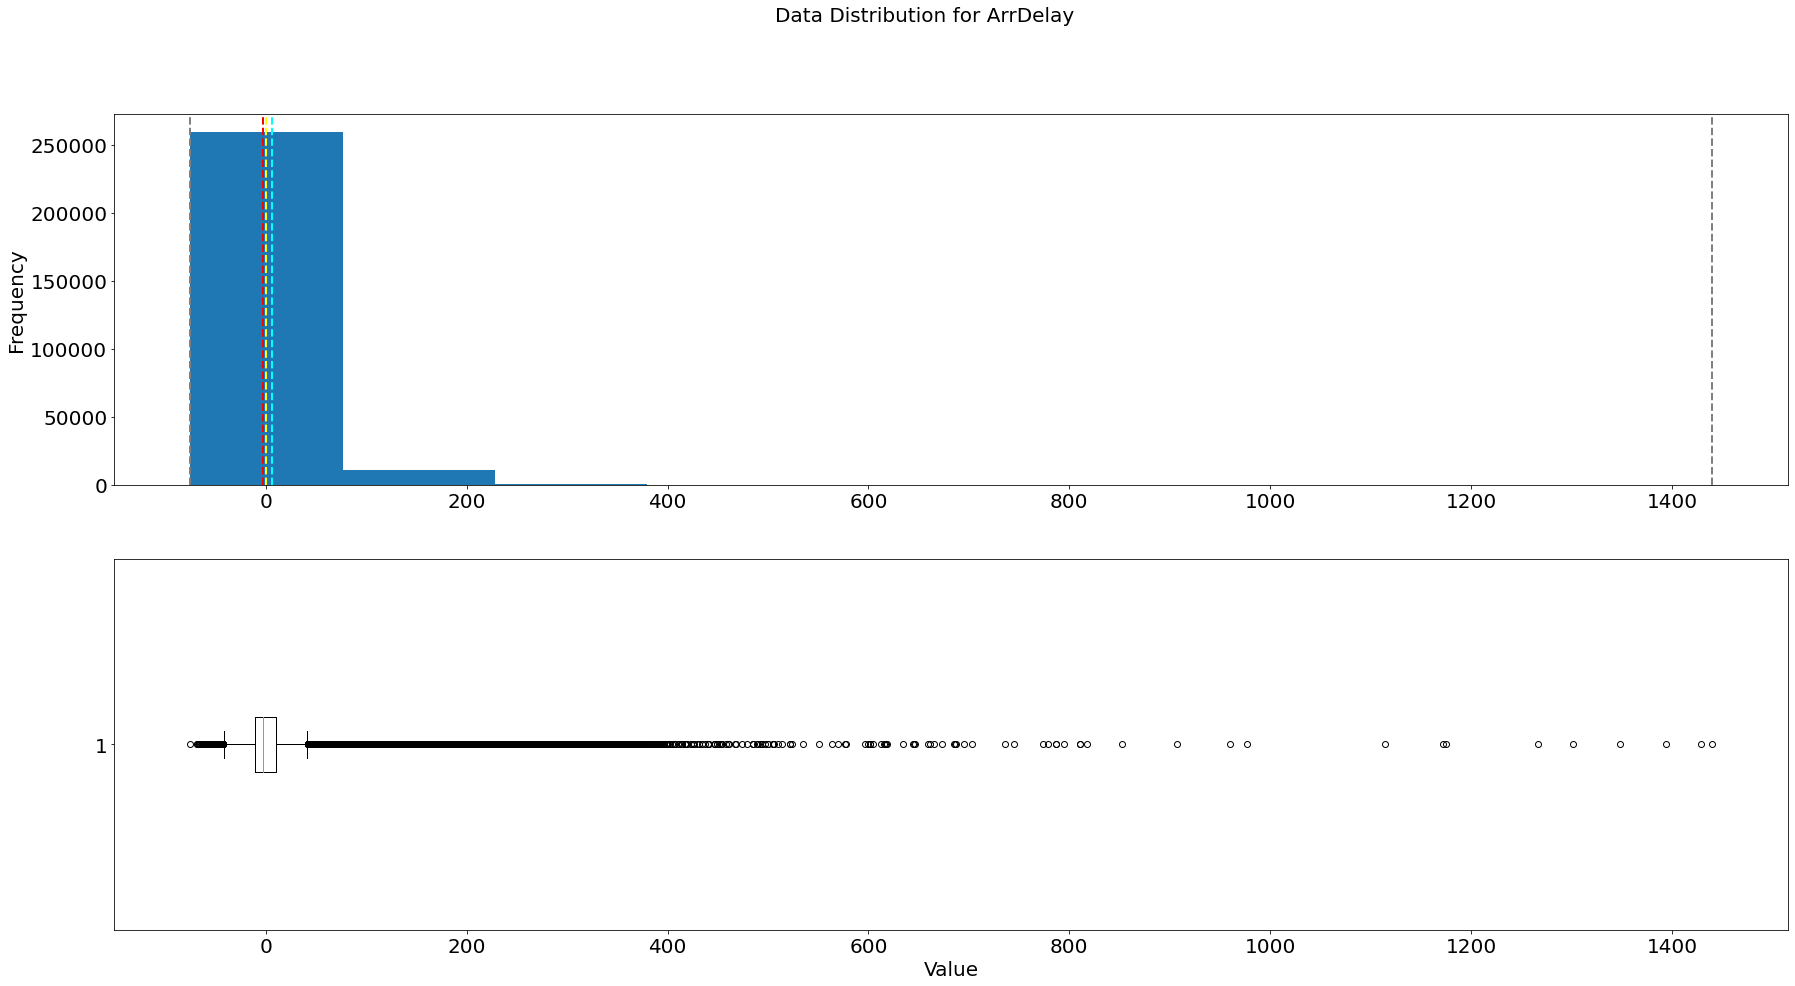

In [120]:
distribution(df_flights['ArrDelay'])

(263165, 22)
Distribution for ArrDelay
Minimum:-41.00
Mean:1.66
Median:-3.00
Mode:0.00
Maximum:99.00



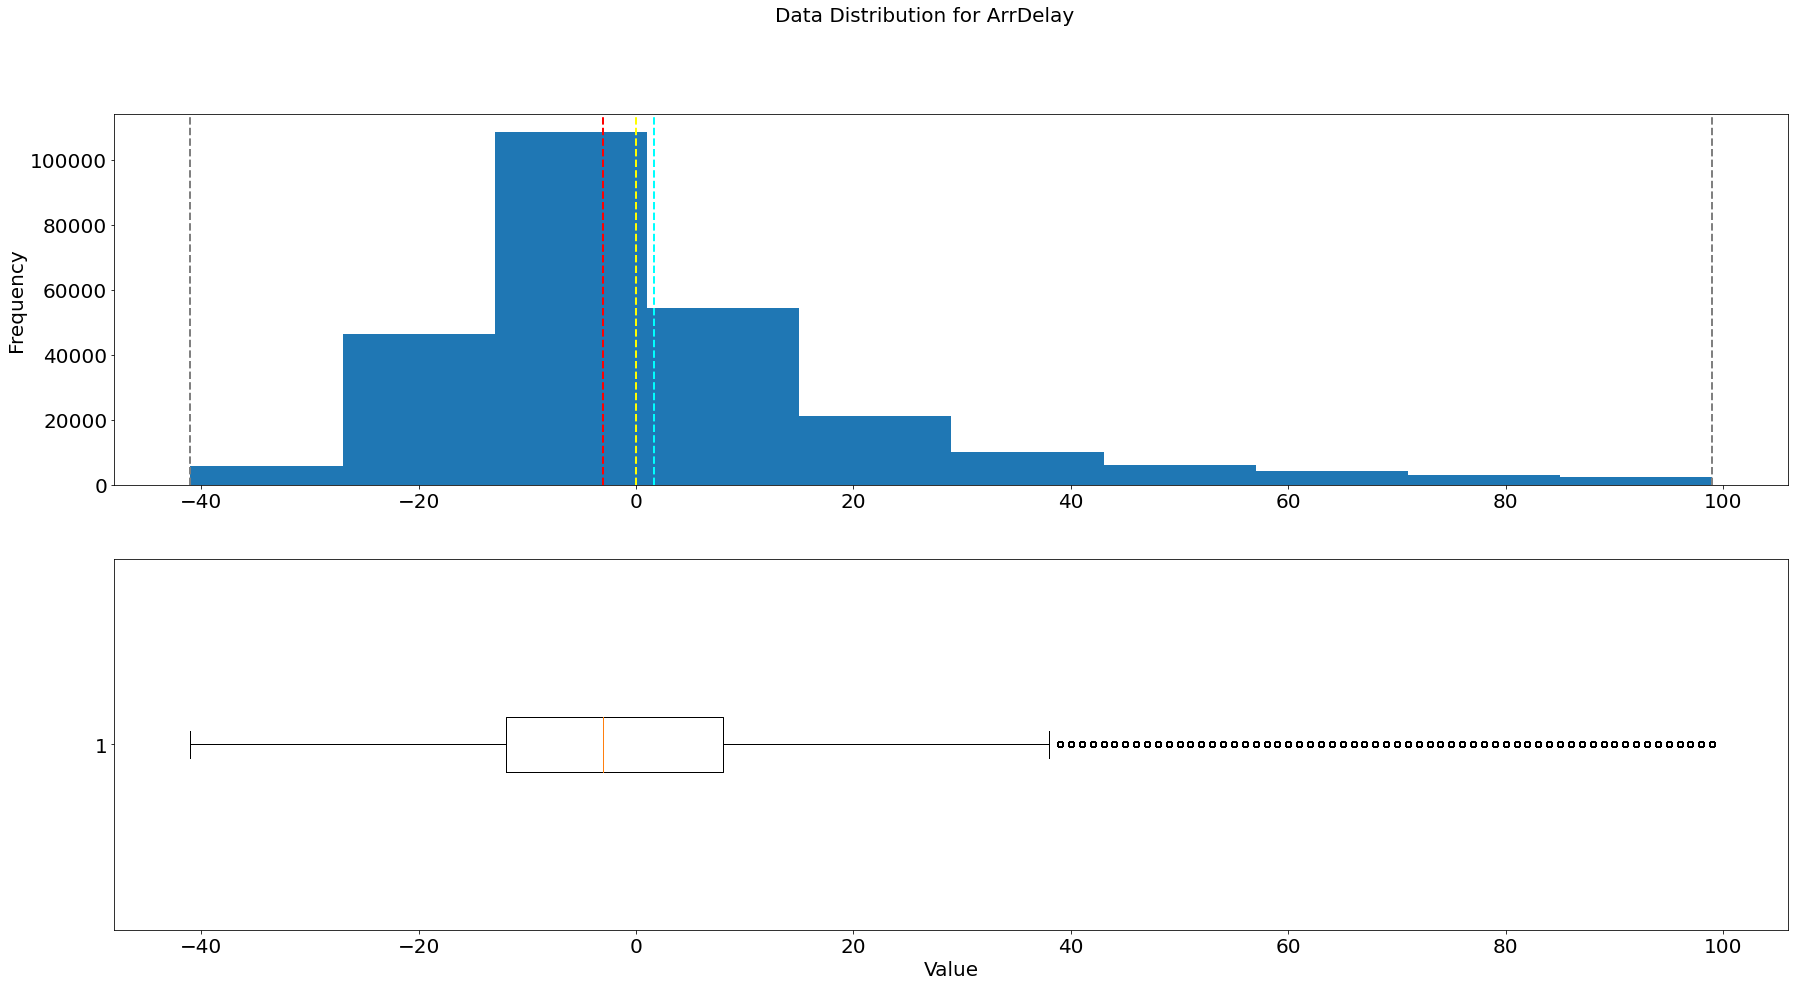

In [121]:
# since it's possible that departure delays can affect the arraval delays we'll just duplicate the original df
arr_qup = df_flights['ArrDelay'].quantile(0.97)
arr_qlow = df_flights['ArrDelay'].quantile(0.002)
arrdel_flights = df_flights
# and improve its distribution
arrdel_flights = arrdel_flights[(arrdel_flights['ArrDelay'] > arr_qlow) & (arrdel_flights['ArrDelay'] < arr_qup)]
print(arrdel_flights.shape)
distribution(arrdel_flights['ArrDelay'])

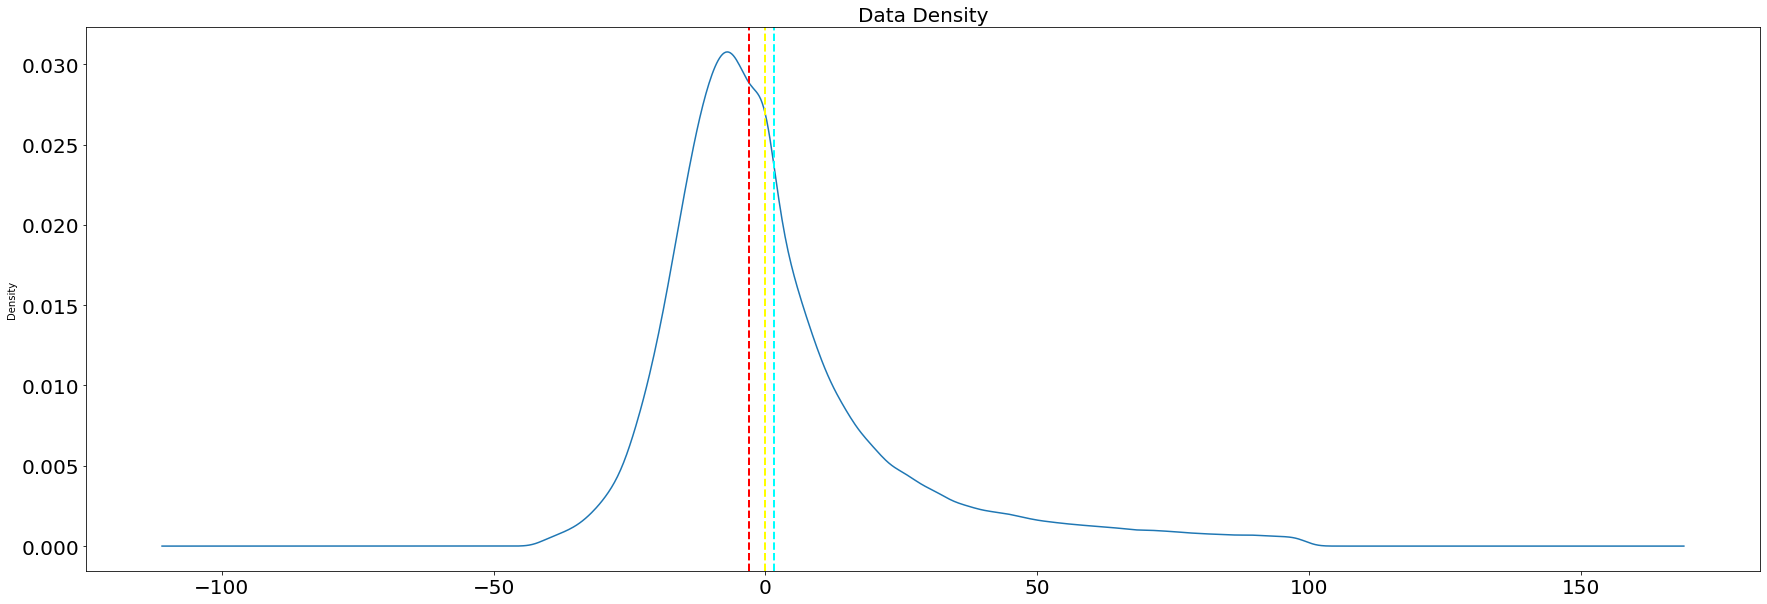

In [122]:
density(arrdel_flights['ArrDelay'])

In [123]:
# meadures of variance
def variance(data):
    name = data.name
    rng = data.max() - data.min()
    var = data.var()
    std = data.std()
    print('\n{}:\n - Range:\t{:.2f}\n - Variance:\t{:.2f}\n - Std.Dev:\t{:.2f}'.format(name, rng, var, std)) 

In [124]:
variance(depdel_flights['DepDelay'])
variance(arrdel_flights['ArrDelay'])


DepDelay:
 - Range:	88.00
 - Variance:	211.78
 - Std.Dev:	14.55

ArrDelay:
 - Range:	140.00
 - Variance:	473.88
 - Std.Dev:	21.77


In [125]:
def std_plot(data: pd.Series):
    from scipy import stats
    from matplotlib import pyplot as plt
    
    # geet the density
    density = stats.gaussian_kde(data)

    # plot the density
    fig = plt.figure(figsize=(30,10))
    data.plot.density()

    # mean and standard deviation
    s = data.std()
    m = data.mean()

    # add annotation for 1 stdev
    x1 = [m - s, m + s]
    y1 = density(x1)
    plt.plot(x1, y1, color = 'magenta')
    plt.annotate('1 std (68.26%)'.format(x1[1]), (x1[1],y1[1]))

    # annotate 2 stdevs
    x2 = [m - (s * 2), m + (s * 2)]
    y2 = density(x2)
    plt.plot(x2, y2, color = 'green')
    plt.annotate('2 std (95.45%) ', (x2[1], y2[1]))

    # annotate 3 stdevs
    x3 = [m - (s * 3), m + (s * 3)]
    y3 = density(x3)
    plt.plot(x3, y3, color = 'orange')
    plt.annotate('2 std (99.73%)', (x3[1], y3[1]))

    # show the mean location
    plt.axvline(m, color = 'cyan', linestyle = 'dashed', linewidth = 1)


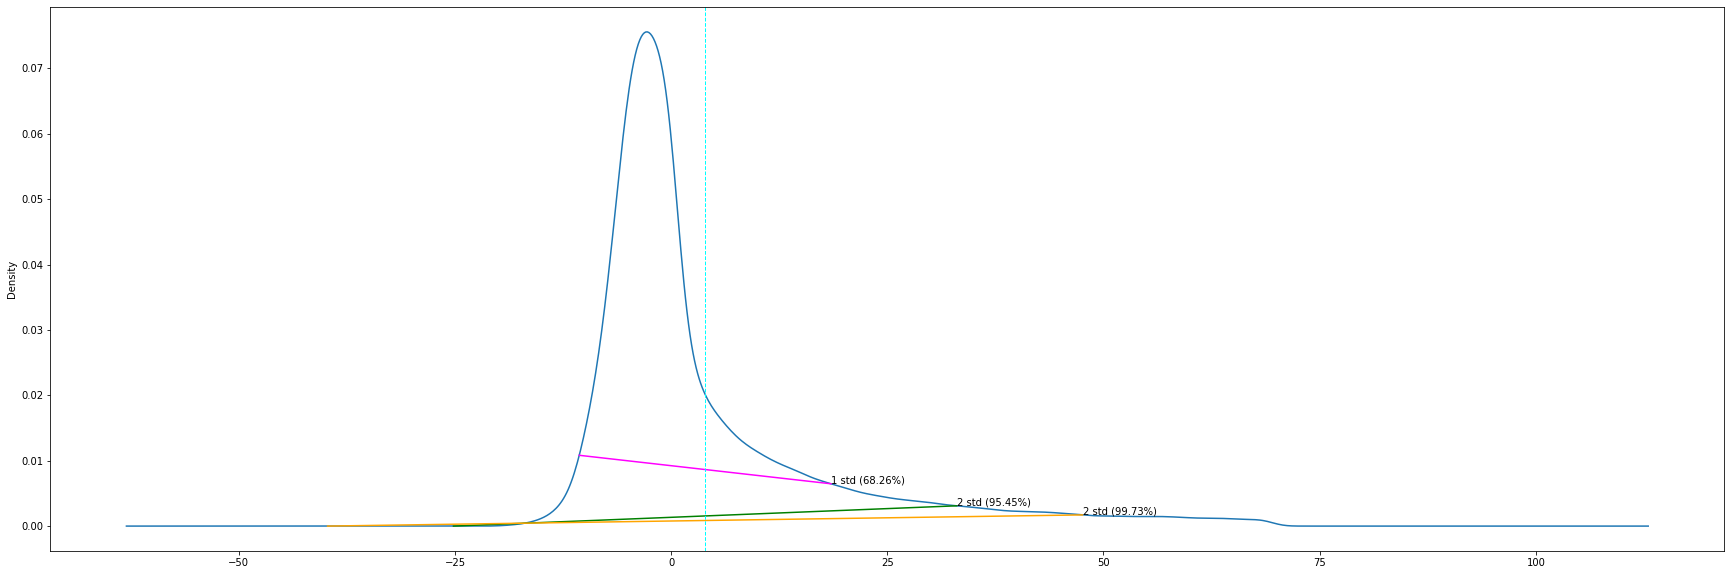

In [126]:
std_plot(depdel_flights['DepDelay'])

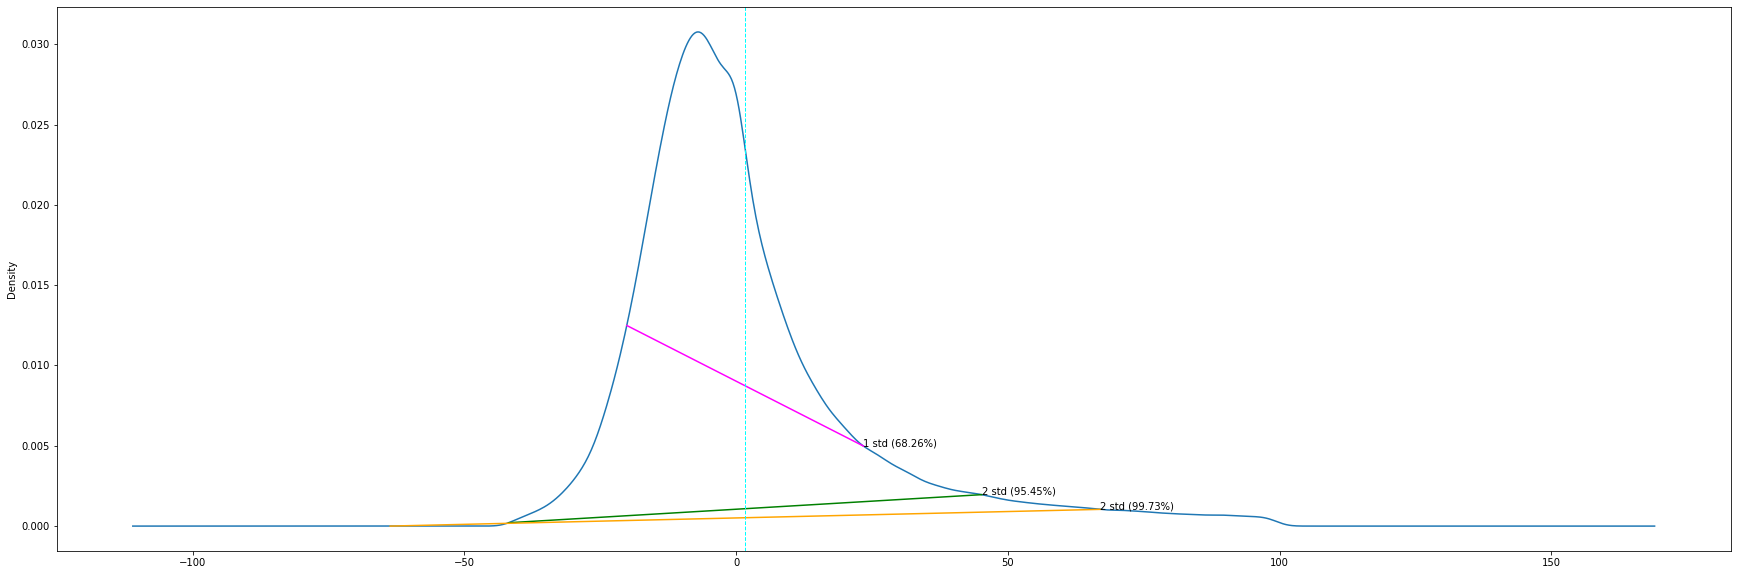

In [127]:
std_plot(arrdel_flights['ArrDelay'])

In [128]:
depdel_flights[['CRSDepTime', 'DepDelay']].describe()

,CRSDepTime,DepDelay
count,258149.00000,258149.000000
mean,1313.63064,3.923703
std,470.36084,14.552689
min,1.00000,-19.000000
25%,910.00000,-4.000000
50%,1310.00000,-1.000000
75%,1715.00000,6.000000
max,2359.00000,69.000000


In [130]:
# this will be our sample
arrdel_flights[['CRSDepTime', 'DepDelay', 'CRSArrTime', 'ArrDelay']].describe()

,CRSDepTime,DepDelay,CRSArrTime,ArrDelay
count,263165.000000,263165.000000,263165.000000,263165.000000
mean,1318.697650,5.750803,1498.942466,1.660719
std,470.723863,19.018221,492.197846,21.768832
min,1.000000,-63.000000,1.000000,-41.000000
25%,915.000000,-4.000000,1115.000000,-12.000000
50%,1314.000000,-1.000000,1521.000000,-3.000000
75%,1719.000000,7.000000,1914.000000,8.000000
max,2359.000000,694.000000,2359.000000,99.000000


### Comparing values

In [142]:
# let's study arrival delays only
sample = arrdel_flights[arrdel_flights['ArrDel15'] == 1]

<AxesSubplot: title={'center': 'ArrDelay'}, xlabel='Carrier'>

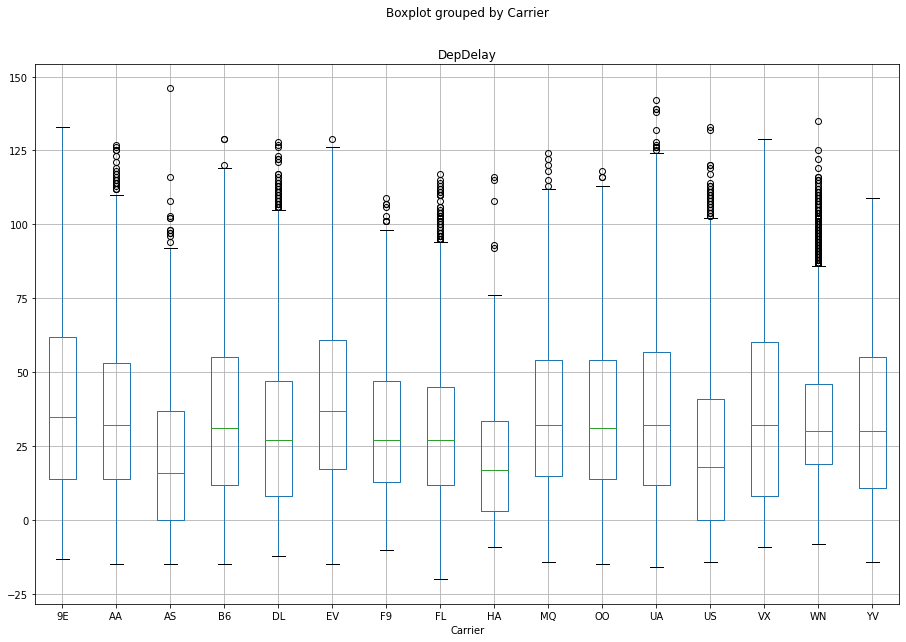

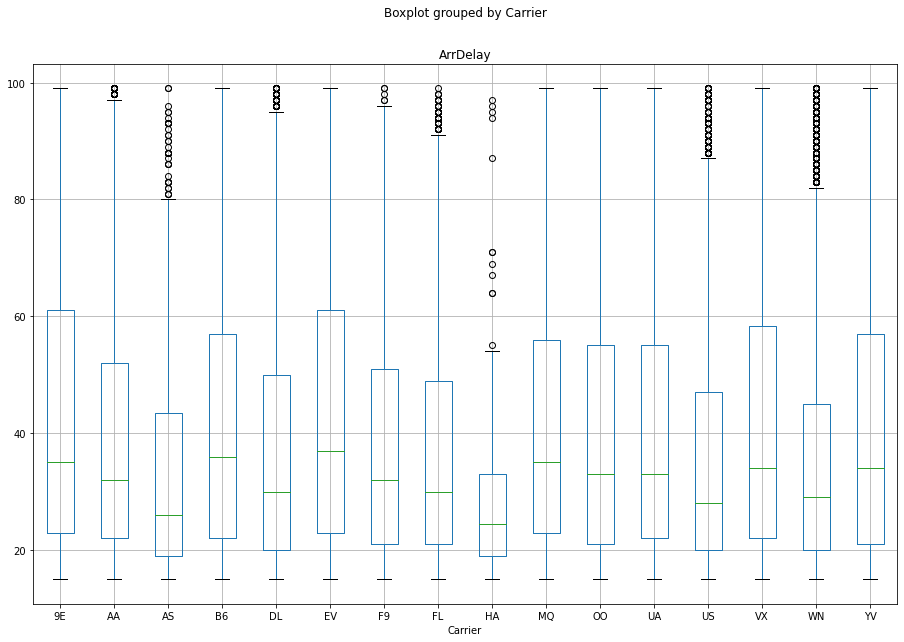

In [143]:
# lets look at different carriers
sample.boxplot(column='DepDelay', by = 'Carrier', figsize=(15, 10))
sample.boxplot(column='ArrDelay', by = 'Carrier', figsize=(15, 10))

<AxesSubplot: title={'center': 'Correlation of Arrival and delay times - 0.77'}, xlabel='ArrDelay', ylabel='DepDelay'>

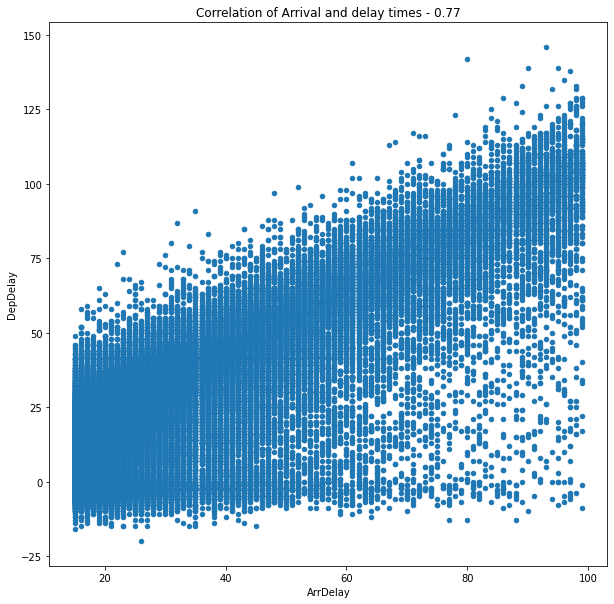

In [145]:
# Let's confirm the correlation between departure delays and arrival delays
corr = sample['ArrDelay'].corr(sample['DepDelay'])

sample.plot.scatter(title='Correlation of Arrival and delay times - {:.2f}'.format(corr), 
    x = 'ArrDelay', y = 'DepDelay', figsize=(10,10))

slope: 0.6133
y-intercept: 17.7530
so...
 f(x) = 0.6133x + 17.7530


C:\Users\sub_b\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


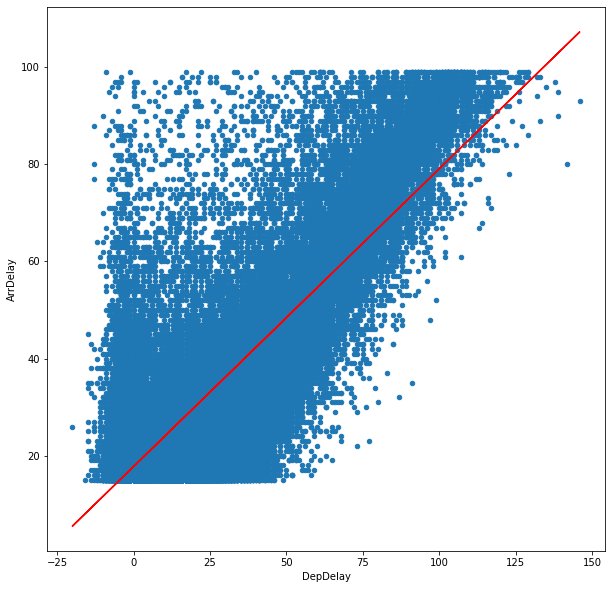

In [148]:
from scipy import stats
from matplotlib import pyplot as plt

df_reg = sample[['ArrDelay', 'DepDelay']].copy()

# regression slope and intercept
m, b, r, p, se = stats.linregress(df_reg['DepDelay'], df_reg['ArrDelay'])
print('slope: {:.4f}\ny-intercept: {:.4f}'.format(m,b))
print('so...\n f(x) = {:.4f}x + {:.4f}'.format(m,b))

#calculate f(x)
df_reg['fx'] = (m * df_reg['DepDelay']) + b

#Calculate the error between the f(x) and the actual y
df_reg['error'] = df_reg['fx'] - df_reg['ArrDelay']

#scatter plot
sample.plot.scatter(x = 'DepDelay', y = 'ArrDelay', figsize=(10,10))

# regression line
plt.plot(df_reg['DepDelay'], df_reg['fx'], color = 'red')

In [149]:
df_reg

,ArrDelay,DepDelay,fx,error
1,22,3,19.592947,-2.407053
3,33,35,39.218734,6.218734
7,15,4,20.206252,5.206252
13,90,95,76.017087,-13.982913
15,26,-7,13.459888,-12.540112
...,...,...,...,...
271925,48,-6,14.073194,-33.926806
271935,18,1,18.366335,0.366335
271936,61,24,32.472370,-28.527630
271937,15,30,36.152205,21.152205


In [151]:
# Define a function for prediction of arrival delay
def f(x):
    return m * x + b

dep_delay = 30

# Get f(x) for departure delay
prediction = f(dep_delay)

# Print the estimation
print('Departure delay of {} minutes can cause an arrival delay of {:.2f} minutes'.format(dep_delay,prediction))

Departure delay of 30 minutes can cause an arrival delay of 36.15 minutes
